# 1.1. Import libraries

In [389]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pmdarima.arima.utils import ndiffs

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import math

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM

# 1.2. Load Data

Importing data which have been extracted by using yfinance which is in data folder.

In [3]:
df=pd.read_excel('../DATA/bitcoin.xlsx')

In [4]:
df

,Unnamed: 0,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day
0,0,465.864014,468.174011,452.421997,457.334015,21056800,0,0,2014,9,17
1,1,456.859985,456.859985,413.104004,424.440002,34483200,0,0,2014,9,18
2,2,424.102997,427.834991,384.532013,394.795990,37919700,0,0,2014,9,19
3,3,394.673004,423.295990,389.882996,408.903992,36863600,0,0,2014,9,20
4,4,408.084991,412.425995,393.181000,398.821014,26580100,0,0,2014,9,21
...,...,...,...,...,...,...,...,...,...,...,...
3107,3107,27768.392578,28439.562500,27439.646484,28175.816406,36102192830,0,0,2023,3,21
3108,3108,28158.720703,28803.335938,26759.996094,27307.437500,33382021890,0,0,2023,3,22
3109,3109,27301.957031,28729.843750,27183.363281,28333.972656,24220433689,0,0,2023,3,23
3110,3110,28324.111328,28388.437500,27039.265625,27493.285156,25980310960,0,0,2023,3,24


# 2. Overview of Data

In [5]:
df.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day
0,0,465.864014,468.174011,452.421997,457.334015,21056800,0,0,2014,9,17
1,1,456.859985,456.859985,413.104004,424.440002,34483200,0,0,2014,9,18
2,2,424.102997,427.834991,384.532013,394.795990,37919700,0,0,2014,9,19
3,3,394.673004,423.295990,389.882996,408.903992,36863600,0,0,2014,9,20
4,4,408.084991,412.425995,393.181000,398.821014,26580100,0,0,2014,9,21


In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

## 2.1. Data Exploration

In [7]:
df.shape

(3112, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3112 non-null   float64
 1   High          3112 non-null   float64
 2   Low           3112 non-null   float64
 3   Close         3112 non-null   float64
 4   Volume        3112 non-null   int64  
 5   Dividends     3112 non-null   int64  
 6   Stock Splits  3112 non-null   int64  
 7   year          3112 non-null   int64  
 8   month         3112 non-null   int64  
 9   day           3112 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 243.2 KB


In [9]:
df.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
year              int64
month             int64
day               int64
dtype: object

In [10]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'year', 'month', 'day'],
      dtype='object')

In [11]:
df['date']= pd.to_datetime(df[['year','month','day']])

In [12]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day,date
0,465.864014,468.174011,452.421997,457.334015,21056800,0,0,2014,9,17,2014-09-17
1,456.859985,456.859985,413.104004,424.440002,34483200,0,0,2014,9,18,2014-09-18
2,424.102997,427.834991,384.532013,394.795990,37919700,0,0,2014,9,19,2014-09-19
3,394.673004,423.295990,389.882996,408.903992,36863600,0,0,2014,9,20,2014-09-20
4,408.084991,412.425995,393.181000,398.821014,26580100,0,0,2014,9,21,2014-09-21
...,...,...,...,...,...,...,...,...,...,...,...
3107,27768.392578,28439.562500,27439.646484,28175.816406,36102192830,0,0,2023,3,21,2023-03-21
3108,28158.720703,28803.335938,26759.996094,27307.437500,33382021890,0,0,2023,3,22,2023-03-22
3109,27301.957031,28729.843750,27183.363281,28333.972656,24220433689,0,0,2023,3,23,2023-03-23
3110,28324.111328,28388.437500,27039.265625,27493.285156,25980310960,0,0,2023,3,24,2023-03-24


In [13]:
df.nunique()

Open            3108
High            3109
Low             3111
Close           3109
Volume          3112
Dividends          1
Stock Splits       1
year              10
month             12
day               31
date            3112
dtype: int64

In [14]:
for c in df.columns:
    x=df[c].unique()
    x.sort()
    print(c,df[c].min(),df[c].max())
    print('Values are:', x)
    

Open 176.8970031738281 67549.734375
Values are: [  176.89700317   200.05000305   207.83399963 ... 66002.234375
 66953.3359375  67549.734375  ]
High 211.7310028076172 68789.625
Values are: [  211.73100281   215.24099731   216.72799683 ... 67673.7421875
 68530.3359375  68789.625     ]
Low 171.5099945068359 66382.0625
Values are: [  171.50999451   176.89700317   194.5059967  ... 63647.80859375
 64180.48828125 66382.0625    ]
Close 178.1029968261719 67566.828125
Values are: [  178.10299683   199.25999451   208.09700012 ... 65992.8359375
 66971.828125   67566.828125  ]
Volume 5914570 350967941479
Values are: [     5914570      6491650      7009320 ... 123320567399 126358098747
 350967941479]
Dividends 0 0
Values are: [0]
Stock Splits 0 0
Values are: [0]
year 2014 2023
Values are: [2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]
month 1 12
Values are: [ 1  2  3  4  5  6  7  8  9 10 11 12]
day 1 31
Values are: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 

In [15]:
df[df.duplicated()]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day,date


In [16]:
df.drop(['year','month','day'], axis=1,inplace=True)

In [17]:
df.date

0      2014-09-17
1      2014-09-18
2      2014-09-19
3      2014-09-20
4      2014-09-21
          ...    
3107   2023-03-21
3108   2023-03-22
3109   2023-03-23
3110   2023-03-24
3111   2023-03-25
Name: date, Length: 3112, dtype: datetime64[ns]

In [18]:
df.set_index('date',inplace=True)

## 2.2. Missing Values

In [19]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

## 2.3. Descriptive Statistics

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3112.0,1.311570e+04,1.605179e+04,1.768970e+02,7.088173e+02,7.323608e+03,1.874782e+04,6.754973e+04
High,3112.0,1.344442e+04,1.646169e+04,2.117310e+02,7.180255e+02,7.492323e+03,1.921875e+04,6.878962e+04
Low,3112.0,1.275370e+04,1.558104e+04,1.715100e+02,6.998793e+02,7.172934e+03,1.814107e+04,6.638206e+04
Close,3112.0,1.312286e+04,1.604878e+04,1.781030e+02,7.111035e+02,7.322260e+03,1.880232e+04,6.756683e+04
Volume,3112.0,1.660929e+10,1.982777e+10,5.914570e+06,1.109125e+08,8.825455e+09,2.816265e+10,3.509679e+11
Dividends,3112.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Stock Splits,3112.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [21]:
df.drop(['Dividends','Stock Splits'], axis=1,inplace=True)

In [22]:
df

,Open,High,Low,Close,Volume
date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2023-03-21,27768.392578,28439.562500,27439.646484,28175.816406,36102192830
2023-03-22,28158.720703,28803.335938,26759.996094,27307.437500,33382021890
2023-03-23,27301.957031,28729.843750,27183.363281,28333.972656,24220433689


In [23]:
df

,Open,High,Low,Close,Volume
date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2023-03-21,27768.392578,28439.562500,27439.646484,28175.816406,36102192830
2023-03-22,28158.720703,28803.335938,26759.996094,27307.437500,33382021890
2023-03-23,27301.957031,28729.843750,27183.363281,28333.972656,24220433689


# 3. Exploratory Data Analysis

## 3.1. Distribution of data

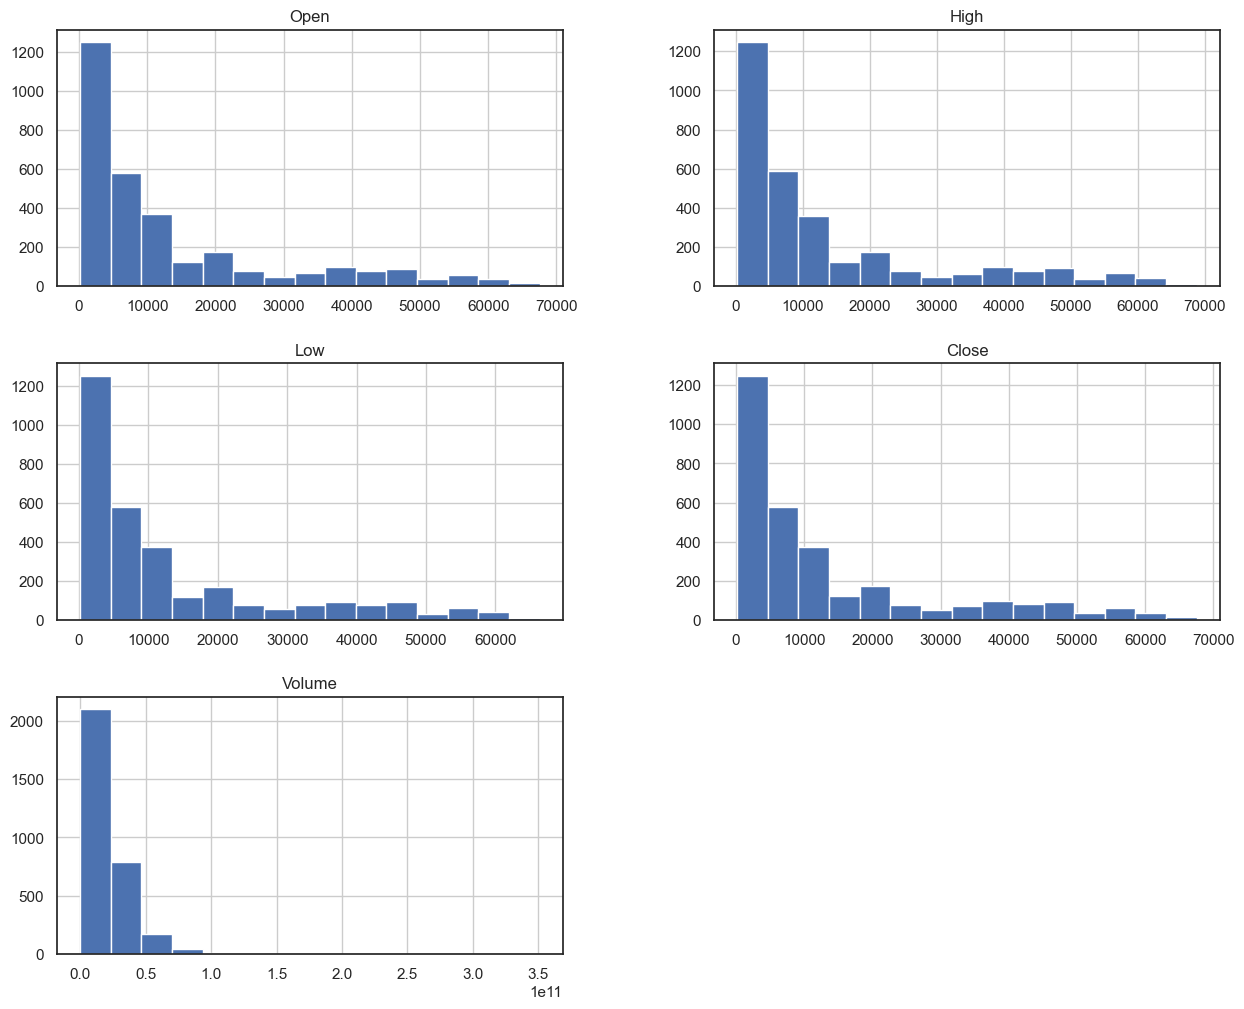

In [281]:
df.hist(figsize=(15,12),bins=15)
plt.title('Distribution of Data')
plt.show()

## 3.2. Quick view of the data

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

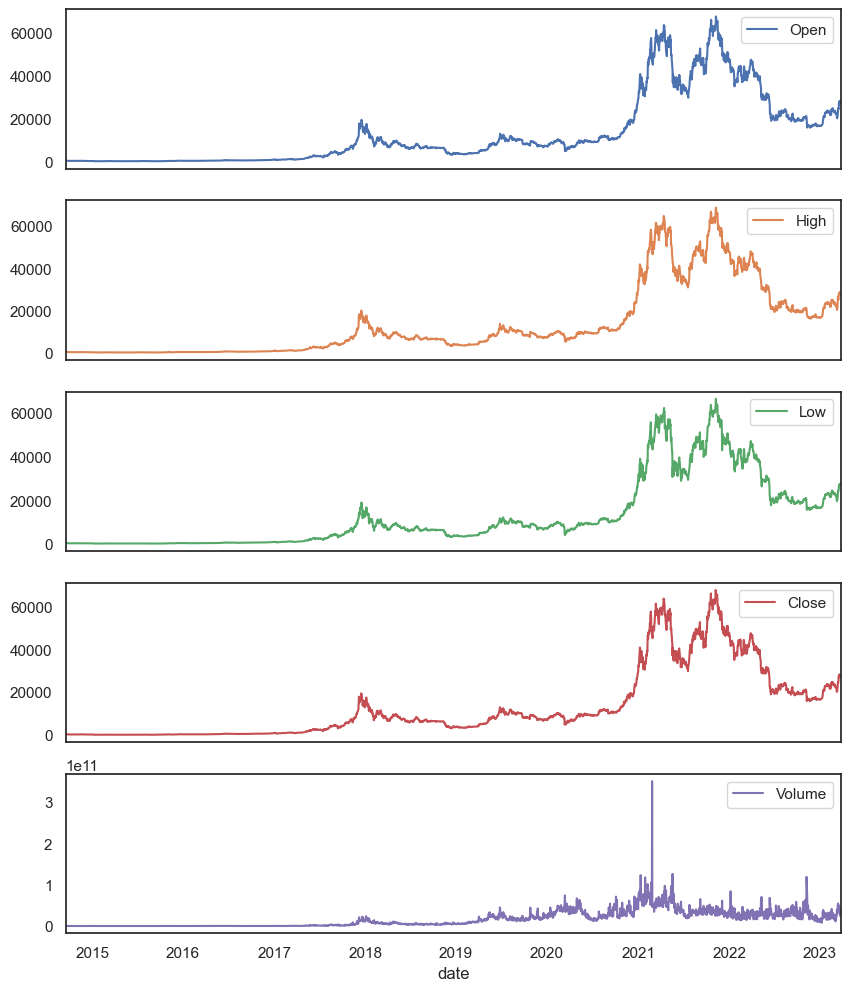

In [282]:
df.plot(subplots=True, figsize=(10,12))

## 3.3. Boxplot

<AxesSubplot:>

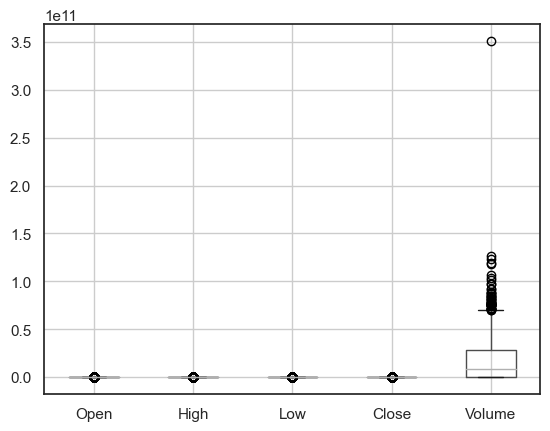

In [283]:
df.boxplot()

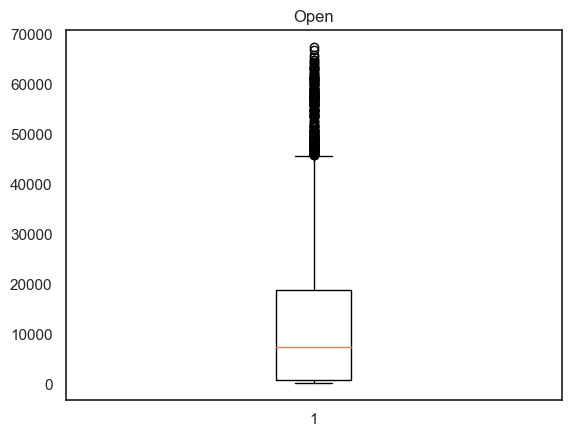

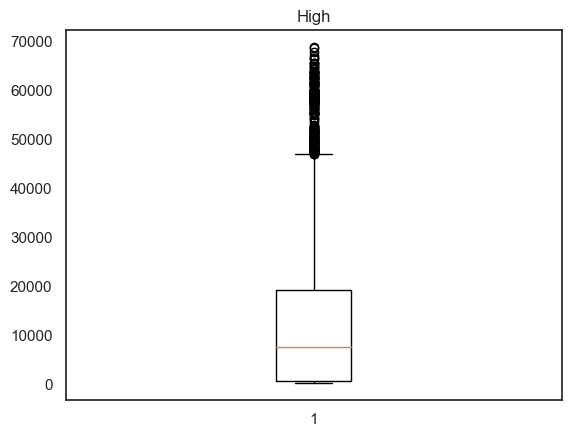

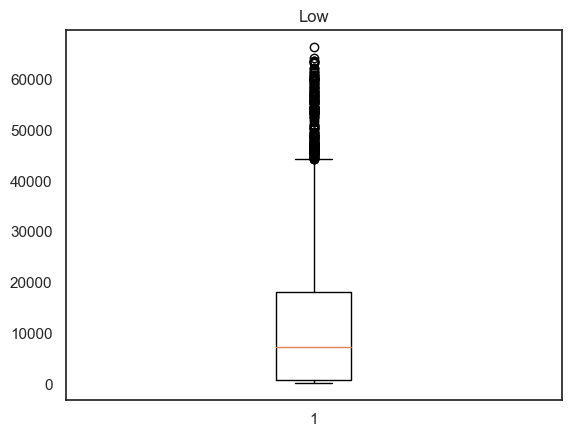

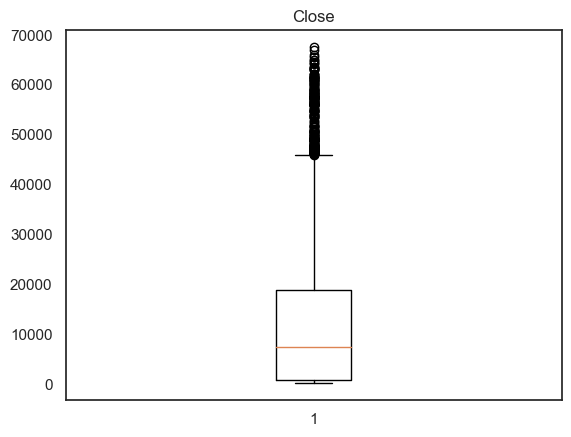

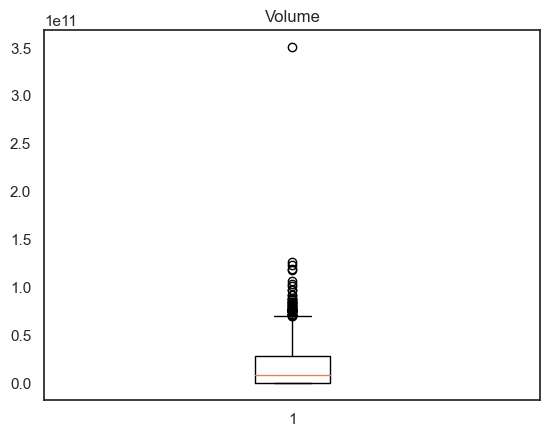

In [284]:
for i,col in enumerate(df.columns):
    fig,ax=plt.subplots()
    ax.boxplot(df[col])
    ax.set_title(col)

## 3.4. Correlation

In [285]:
df.corr().T

,Open,High,Low,Close,Volume
Open,1.000000,0.999504,0.999095,0.998775,0.717441
High,0.999504,1.000000,0.998998,0.999457,0.721381
Low,0.999095,0.998998,1.000000,0.999364,0.709332
Close,0.998775,0.999457,0.999364,1.000000,0.716100
Volume,0.717441,0.721381,0.709332,0.716100,1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_2684\2564978959.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


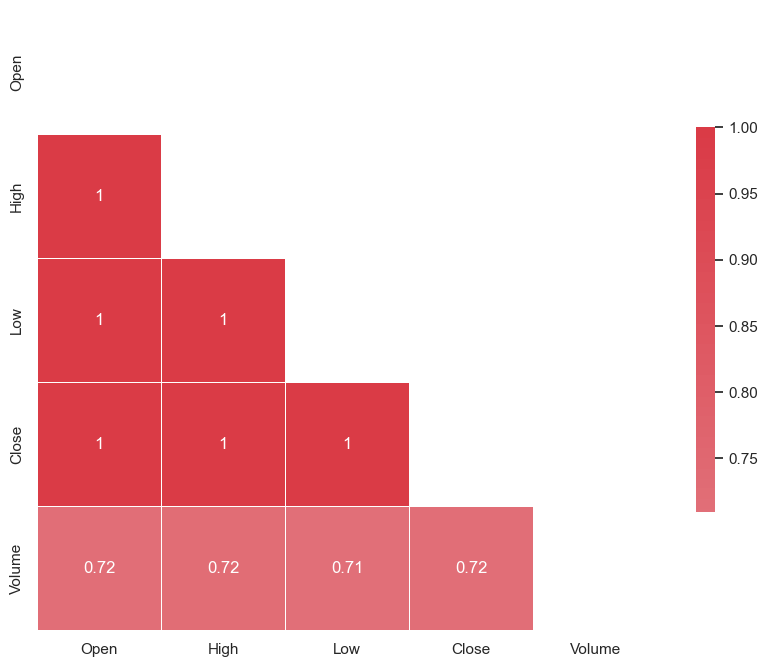

In [286]:
sns.set(style="white")
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.savefig('pics/Correaltion.png')
plt.show()

Since the feature is highly correlated with each other, so  linear regression doesnot work because of multicollinearity. 

In [287]:
X=df[['Open','High','Low','Volume']]
y=df['Close']

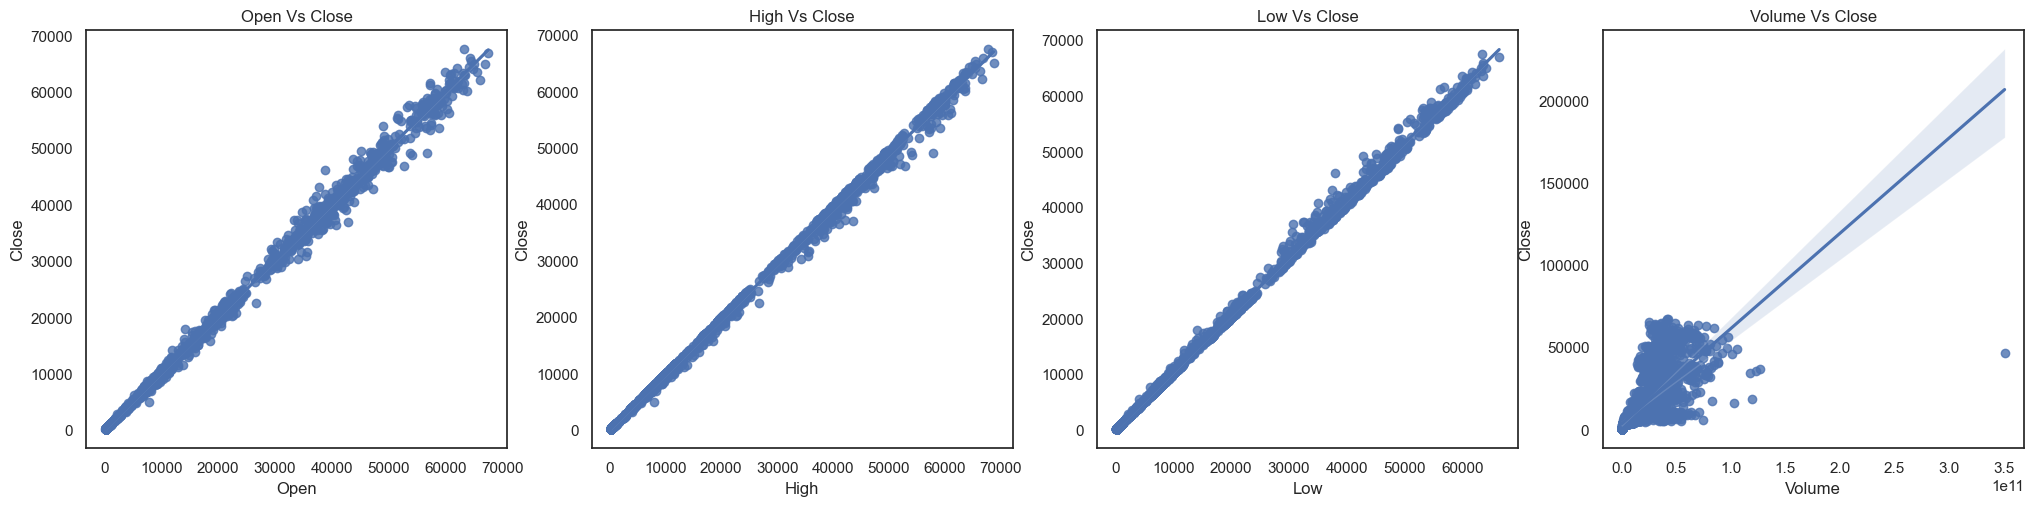

In [288]:
plt.figure(figsize=(25,25))
for i,col in enumerate(X):
    plt.subplot(4,4,i+1)
    sns.regplot(x=col, y=y,data=df)
    plt.title(f'{col} Vs Close')

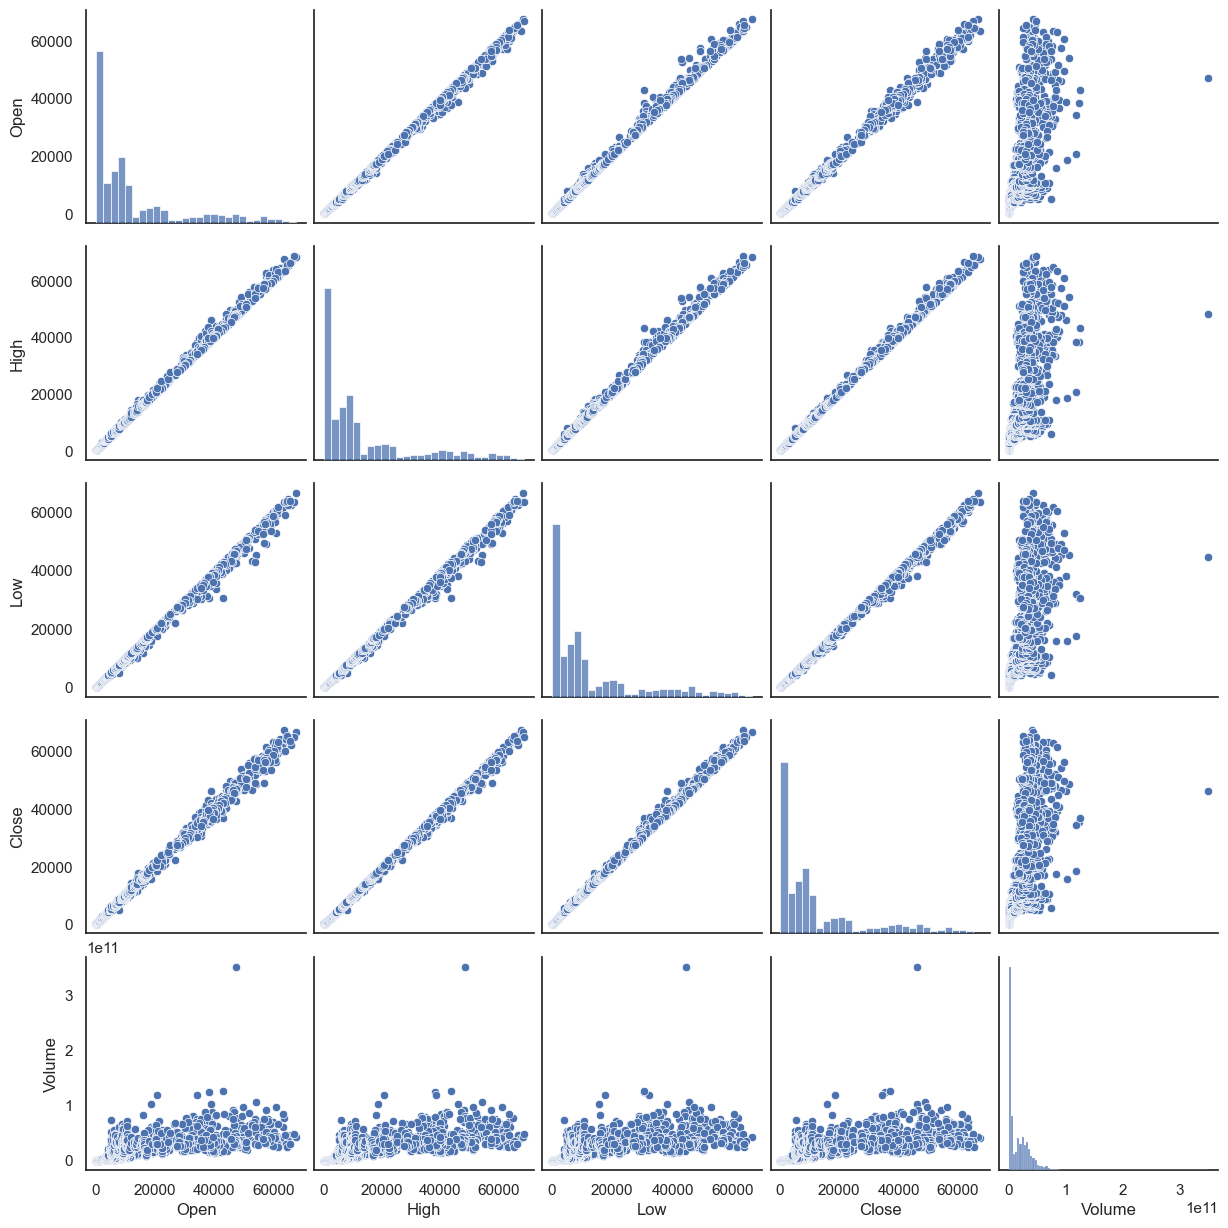

In [289]:
sns.pairplot(data=df)

## 3.5. Investment Analysis

In [24]:
data=df.copy()

In [25]:
data

,Open,High,Low,Close,Volume
date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2023-03-21,27768.392578,28439.562500,27439.646484,28175.816406,36102192830
2023-03-22,28158.720703,28803.335938,26759.996094,27307.437500,33382021890
2023-03-23,27301.957031,28729.843750,27183.363281,28333.972656,24220433689


In [292]:
data.reset_index(inplace=True)

### 3.5.1. All time high

In [293]:
datetime=data[data['Close']==data['Close'].max()]['date'].values

In [294]:
high= round(data['Close'].max())

In [295]:
high

67567

In [296]:
datetime

array(['2021-11-08T00:00:00.000000000'], dtype='datetime64[ns]')

In [297]:
if not os.path.exists('pics'):
    os.makedirs('pics')

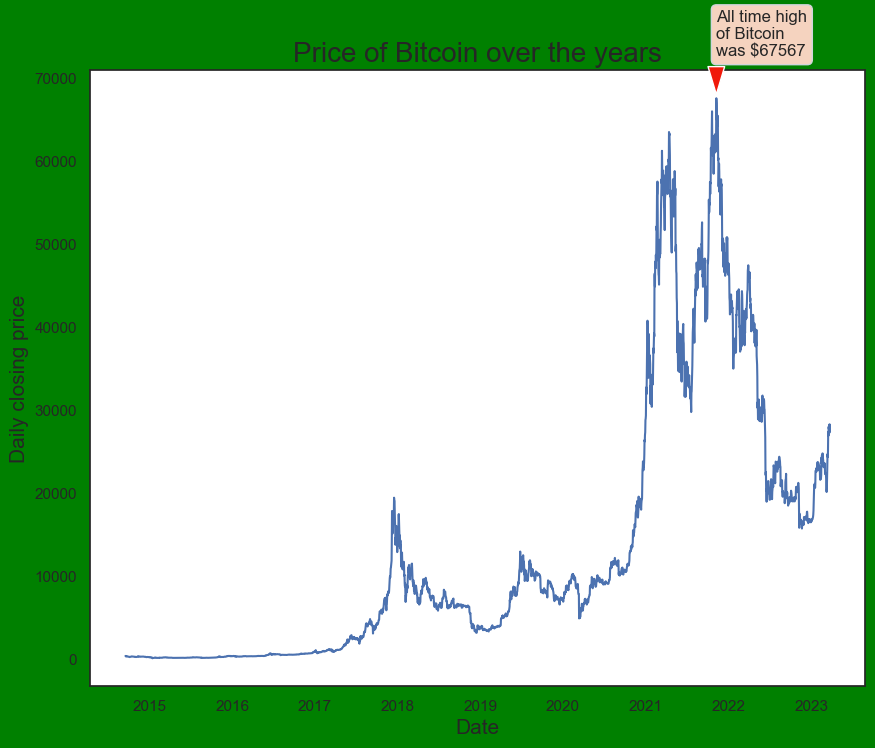

In [298]:
fig, ax = plt.subplots(figsize=(10,8), facecolor='green')
ax.plot(data['date'], data['Close'])
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily closing price", fontsize=15)
ax.set_title('Price of Bitcoin over the years', fontsize=20)
ax.annotate(f"All time high\nof Bitcoin\nwas ${high}", xy=(datetime, high),xytext=(datetime,high+5000),bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),arrowprops=dict(facecolor='#f0190a',headlength=20, shrink=0.1))
plt.savefig('pics/Closingprice.png')
plt.show()

### 3.5.2. Checking today's worth when you invested 100 in 2014.

In [299]:
data['returns']= data['Close'].pct_change()

In [300]:
data

,date,Open,High,Low,Close,Volume,returns
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,-0.071926
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,-0.069843
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.035735
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,-0.024659
...,...,...,...,...,...,...,...
3107,2023-03-21,27768.392578,28439.562500,27439.646484,28175.816406,36102192830,0.014714
3108,2023-03-22,28158.720703,28803.335938,26759.996094,27307.437500,33382021890,-0.030820
3109,2023-03-23,27301.957031,28729.843750,27183.363281,28333.972656,24220433689,0.037592
3110,2023-03-24,28324.111328,28388.437500,27039.265625,27493.285156,25980310960,-0.029671


In [301]:
data['cumulative_returns']= (1+data['returns']).cumprod()

In [302]:
data

,date,Open,High,Low,Close,Volume,returns,cumulative_returns
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,NaN,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,-0.071926,0.928074
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,-0.069843,0.863255
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.035735,0.894104
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,-0.024659,0.872056
...,...,...,...,...,...,...,...,...
3107,2023-03-21,27768.392578,28439.562500,27439.646484,28175.816406,36102192830,0.014714,61.608836
3108,2023-03-22,28158.720703,28803.335938,26759.996094,27307.437500,33382021890,-0.030820,59.710051
3109,2023-03-23,27301.957031,28729.843750,27183.363281,28333.972656,24220433689,0.037592,61.954658
3110,2023-03-24,28324.111328,28388.437500,27039.265625,27493.285156,25980310960,-0.029671,60.116423


In [303]:
data['investment']= 100* (1+data['cumulative_returns'])

In [304]:
data

,date,Open,High,Low,Close,Volume,returns,cumulative_returns,investment
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,NaN,NaN,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,-0.071926,0.928074,192.807442
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,-0.069843,0.863255,186.325525
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.035735,0.894104,189.410361
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,-0.024659,0.872056,187.205631
...,...,...,...,...,...,...,...,...,...
3107,2023-03-21,27768.392578,28439.562500,27439.646484,28175.816406,36102192830,0.014714,61.608836,6260.883619
3108,2023-03-22,28158.720703,28803.335938,26759.996094,27307.437500,33382021890,-0.030820,59.710051,6071.005132
3109,2023-03-23,27301.957031,28729.843750,27183.363281,28333.972656,24220433689,0.037592,61.954658,6295.465838
3110,2023-03-24,28324.111328,28388.437500,27039.265625,27493.285156,25980310960,-0.029671,60.116423,6111.642314


In [305]:
datetime=data[data['investment']==data['investment'].max()]['date'].values

In [306]:
high= round(data['investment'].max())

In [307]:
high

14874

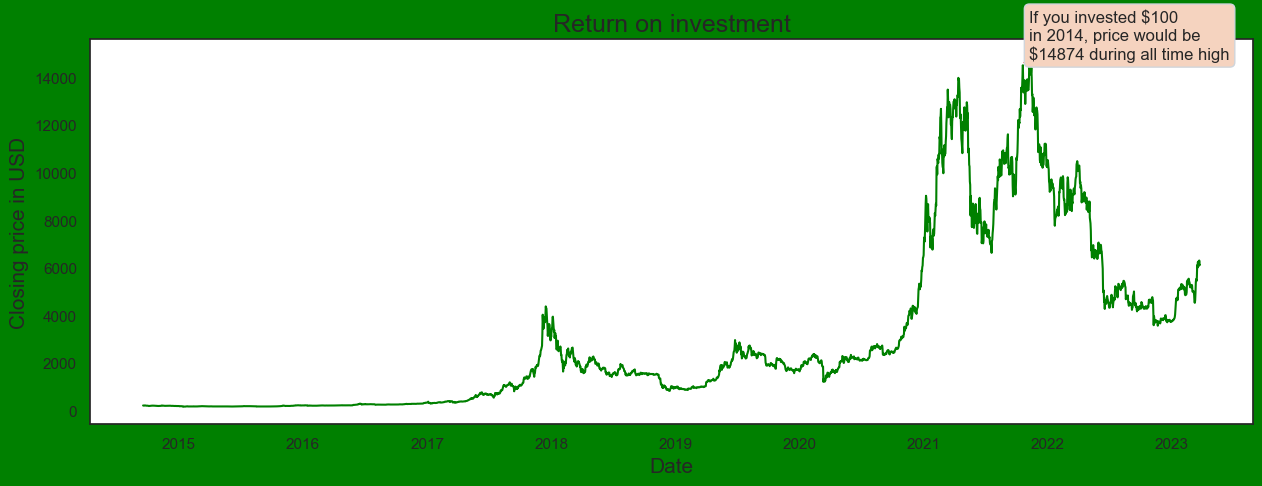

In [308]:
fig, ax = plt.subplots(figsize=(15,5), facecolor='green')
ax.plot(data['date'], data['investment'], color='green')
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Closing price in USD", fontsize=15)
ax.set_title('Return on investment', fontsize=18)
ax.annotate(f"If you invested $100\nin 2014, price would be\n${high} during all time high", xy=(datetime, high),xytext=(datetime,high-100),bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),arrowprops=dict(facecolor='#f0190a',headlength=5, shrink=10))
plt.savefig('pics/Return.png')
plt.show()

### 3.5.3. What happens when you invested during all time high?

In [309]:
data['Close'].max()

67566.828125

In [310]:
data[data['Close']>67555]

,date,Open,High,Low,Close,Volume,returns,cumulative_returns,investment
2609,2021-11-08,63344.066406,67673.742188,63344.066406,67566.828125,41125608330,0.066952,147.740658,14874.065765


In [311]:
high=data[data['date']>='2021-11-08'].copy()

In [312]:
high

,date,Open,High,Low,Close,Volume,returns,cumulative_returns,investment
2609,2021-11-08,63344.066406,67673.742188,63344.066406,67566.828125,41125608330,0.066952,147.740658,14874.065765
2610,2021-11-09,67549.734375,68530.335938,66382.062500,66971.828125,42357991721,-0.008806,146.439639,14743.963918
2611,2021-11-10,66953.335938,68789.625000,63208.113281,64995.230469,48730828378,-0.029514,142.117639,14311.763908
2612,2021-11-11,64978.890625,65579.015625,64180.488281,64949.960938,35880633236,-0.000697,142.018653,14301.865337
2613,2021-11-12,64863.980469,65460.816406,62333.914062,64155.941406,36084893887,-0.012225,140.282462,14128.246165
...,...,...,...,...,...,...,...,...,...
3107,2023-03-21,27768.392578,28439.562500,27439.646484,28175.816406,36102192830,0.014714,61.608836,6260.883619
3108,2023-03-22,28158.720703,28803.335938,26759.996094,27307.437500,33382021890,-0.030820,59.710051,6071.005132
3109,2023-03-23,27301.957031,28729.843750,27183.363281,28333.972656,24220433689,0.037592,61.954658,6295.465838
3110,2023-03-24,28324.111328,28388.437500,27039.265625,27493.285156,25980310960,-0.029671,60.116423,6111.642314


In [313]:
all_time_high= high['Close'].max()

In [314]:
all_time_high_row= high[high['Close']== all_time_high]

In [315]:
all_time_high_dates= high['date'].values[0]

In [316]:
last_row= high.iloc[-1]

In [317]:
last_row

date                  2023-03-25 00:00:00
Open                         27486.414062
High                         27658.384766
Low                          27471.558594
Close                        27486.728516
Volume                        26074308608
returns                         -0.000238
cumulative_returns              60.102086
investment                    6110.208649
Name: 3111, dtype: object

In [318]:
investment_return= (last_row['Close']/all_time_high)*100-100

In [319]:
high['ROI']= (high['Close']-all_time_high)/all_time_high*100

In [320]:
high

,date,Open,High,Low,Close,Volume,returns,cumulative_returns,investment,ROI
2609,2021-11-08,63344.066406,67673.742188,63344.066406,67566.828125,41125608330,0.066952,147.740658,14874.065765,0.000000
2610,2021-11-09,67549.734375,68530.335938,66382.062500,66971.828125,42357991721,-0.008806,146.439639,14743.963918,-0.880610
2611,2021-11-10,66953.335938,68789.625000,63208.113281,64995.230469,48730828378,-0.029514,142.117639,14311.763908,-3.806006
2612,2021-11-11,64978.890625,65579.015625,64180.488281,64949.960938,35880633236,-0.000697,142.018653,14301.865337,-3.873006
2613,2021-11-12,64863.980469,65460.816406,62333.914062,64155.941406,36084893887,-0.012225,140.282462,14128.246165,-5.048168
...,...,...,...,...,...,...,...,...,...,...
3107,2023-03-21,27768.392578,28439.562500,27439.646484,28175.816406,36102192830,0.014714,61.608836,6260.883619,-58.299335
3108,2023-03-22,28158.720703,28803.335938,26759.996094,27307.437500,33382021890,-0.030820,59.710051,6071.005132,-59.584550
3109,2023-03-23,27301.957031,28729.843750,27183.363281,28333.972656,24220433689,0.037592,61.954658,6295.465838,-58.065262
3110,2023-03-24,28324.111328,28388.437500,27039.265625,27493.285156,25980310960,-0.029671,60.116423,6111.642314,-59.309493


In [321]:
datetime= high[high['ROI']==high['ROI'].min()]['date'].values

In [322]:
datetime

array(['2022-11-21T00:00:00.000000000'], dtype='datetime64[ns]')

In [323]:
loss= round(high['ROI'].min())

In [324]:
loss

-77

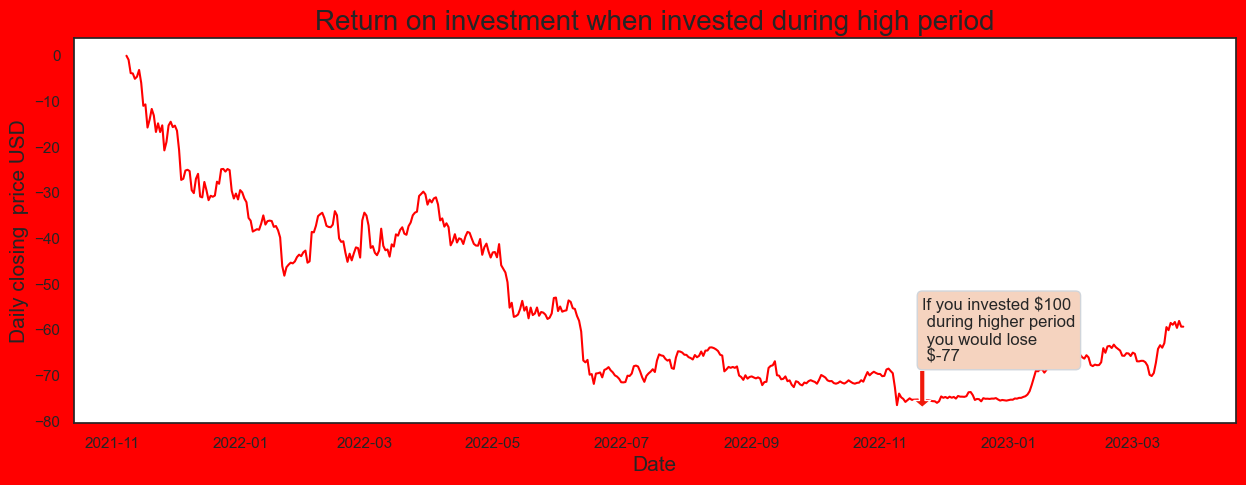

In [325]:
fig, ax = plt.subplots(figsize=(15,5), facecolor='red')
ax.plot(high['date'], high['ROI'], color='red')
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily closing  price USD", fontsize=15)
ax.set_title('Return on investment when invested during high period', fontsize=20)
ax.annotate(f"If you invested $100\n during higher period\n you would lose\n ${loss}", xy=(datetime, loss),xytext=(datetime,loss+10),bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),arrowprops=dict(facecolor='#f0190a',headlength=5, shrink=100))
plt.savefig('pics/Losses.png')
plt.show()

## 3.6. Volume Traded

In [326]:
max_x= data['date'].max()
max_y= data['Volume'].max()

min_x= data['date'].min()
min_y= data['Volume'].min()

mean_x= data['date'].mean()
mean_y= data['Volume'].mean()

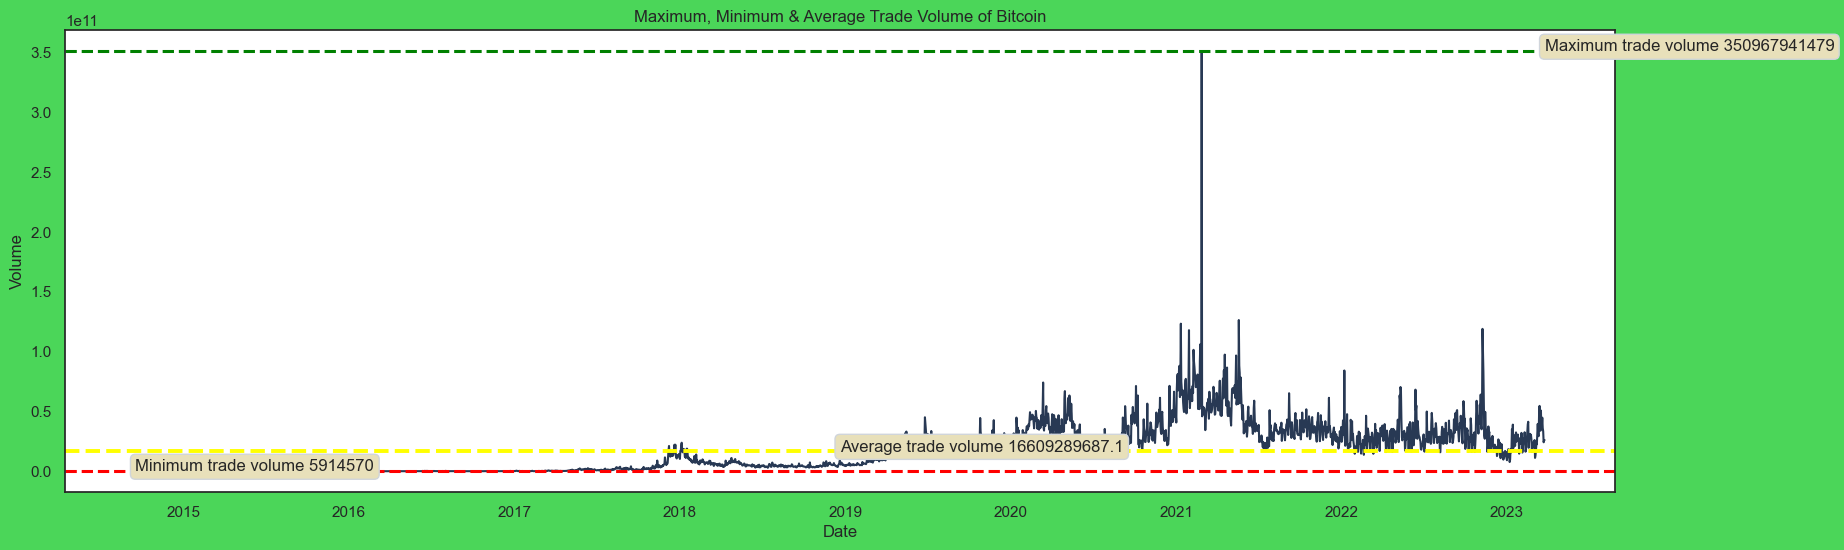

In [327]:
fig, ax = plt.subplots(figsize=(20,6), facecolor='#4bd659')
ax.plot(data['date'], data['Volume'], color='#283954')
ax.axhline(y=data['Volume'].max(), linestyle='--', lw=2.2, color='green')
ax.axhline(y=data['Volume'].min(), linestyle='--',lw=2.2, color='red')
ax.axhline(y=data['Volume'].mean(), linestyle='--',lw=2.8, color='yellow')
ax.annotate(f"Average trade volume {round(data['Volume'].mean(),2)}", xy=(mean_x,mean_y), xytext=(mean_x,mean_y-1000),bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db'))
ax.annotate(f"Maximum trade volume {round(data['Volume'].max(),2)}", xy=(max_x,max_y),xytext=(max_x,max_y+1000),bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db') )
ax.annotate(f"Minimum trade volume {round(data['Volume'].min(),2)}", xy=(min_x,min_y),xytext=(min_x,min_y+100000),bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db'))
ax.set_title(f"Maximum, Minimum & Average Trade Volume of Bitcoin")
ax.set_xlabel('Date')
ax.set_ylabel('Volume')
plt.savefig('pics/Volumetraded.png')
plt.show()

## 3.7. Moving Average

In [328]:
moving_average=data.loc[data['Close']>30000].copy()

In [329]:
moving_average.set_index('date',inplace=True)

In [330]:
moving_average['ma_30']= moving_average['Close'].rolling(30).mean()

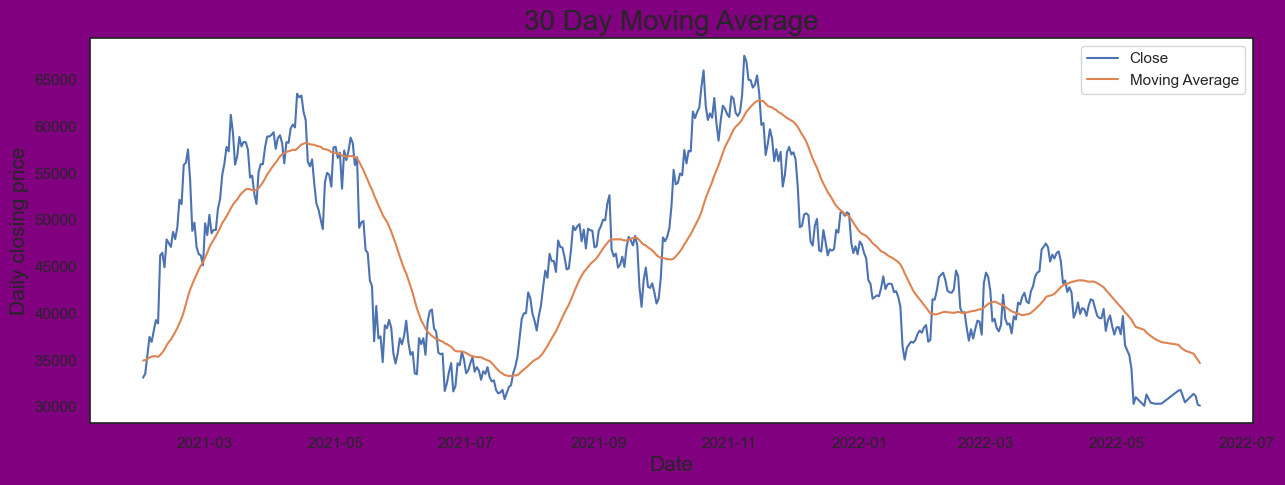

In [331]:
fig, ax = plt.subplots(figsize=(15,5), facecolor='purple')
ax.plot(moving_average[['Close','ma_30']].dropna())
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily closing price", fontsize=15)
ax.set_title('30 Day Moving Average', fontsize=20)
plt.legend(['Close', 'Moving Average'])
plt.savefig('pics/Moving Average.png')

<AxesSubplot:xlabel='date'>

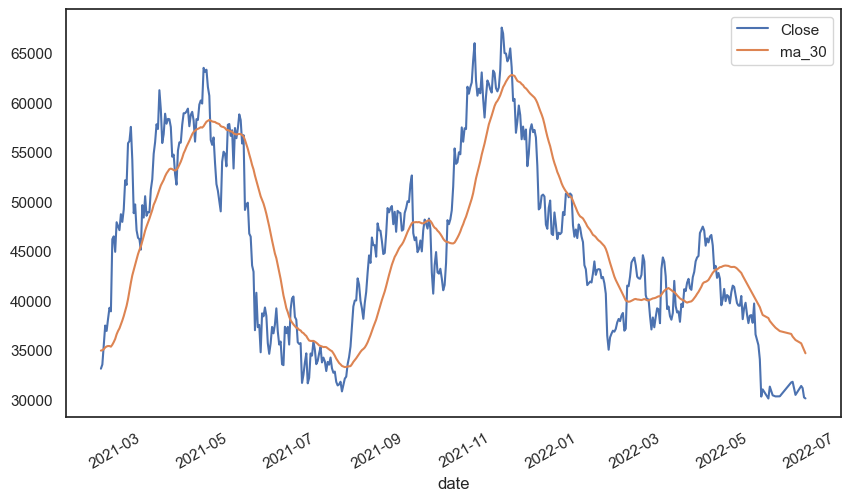

In [73]:
moving_average[['Close','ma_30']].dropna().plot(figsize=(10,6))

In [74]:
moving_average['ma_60']= moving_average['Close'].rolling(60).mean()

Text(0.5, 1.0, '60 Day Moving Average')

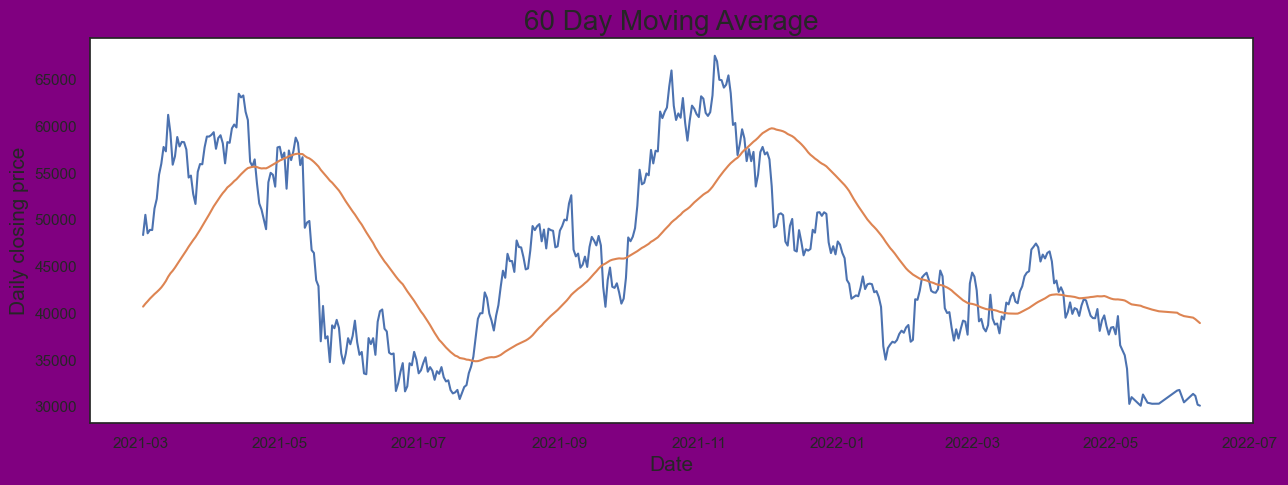

In [75]:
fig, ax = plt.subplots(figsize=(15,5), facecolor='purple')
ax.plot(moving_average[['Close','ma_60']].dropna())
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily closing price", fontsize=15)
ax.set_title('60 Day Moving Average', fontsize=20)

In [76]:
moving_average['ma_14']= moving_average['Close'].rolling(14).mean()

Text(0.5, 1.0, '14 Day Moving Average')

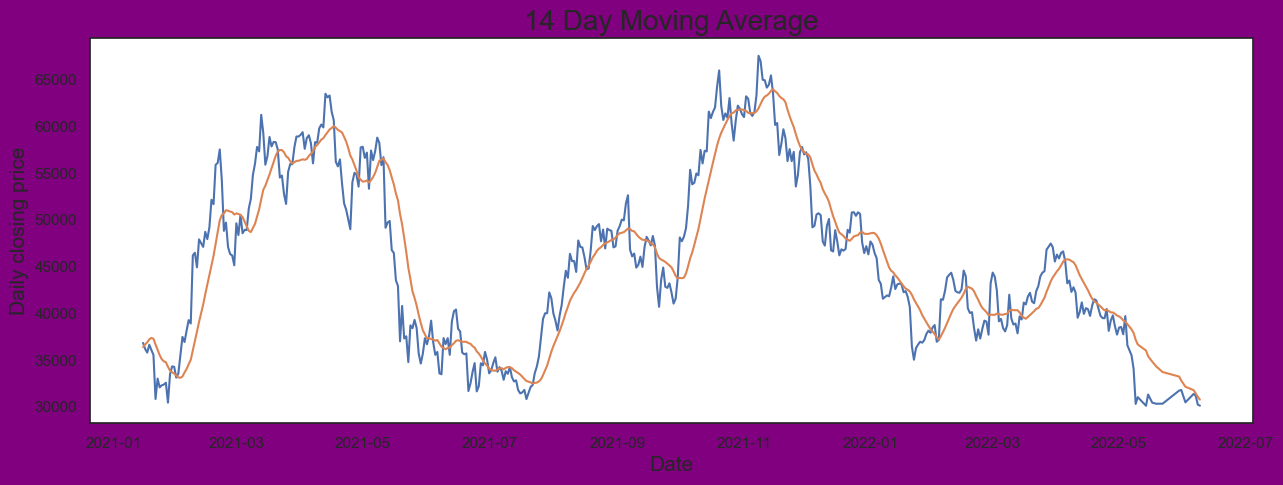

In [77]:
fig, ax = plt.subplots(figsize=(15,5), facecolor='purple')
ax.plot(moving_average[['Close','ma_14']].dropna())
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily closing price", fontsize=15)
ax.set_title('14 Day Moving Average', fontsize=20)

# 4.0. Models

## 4.1.ARIMA Models

ARIMA model is best used when we have time series.

AR- AutoRegressive dependent relationship between observation and some lagged observations(p)

I- Integrated used for differencing raw observation subtracting one observations from another from previous timestamps to make time series stationary(d)

MA- Moving Average dependency between an observation and residual erros from a moving average model applied to lagged observations It takes account in past values to predict future values(q)

Lagging a time series means to shift its values forward one or more time steps, or equivalently, to shift the times in its index backward one or more steps.

### Univariate Analysis:
Looking into one variable to predict the price.

In [28]:
df=df[['Close']].copy()

In [29]:
df

,Close
date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2023-03-21,28175.816406
2023-03-22,27307.437500
2023-03-23,28333.972656


The main assumption for ARIMA model is that timeseries should be stationary. We can check the stationarity by ADF test. 

Stationary time series has statistical properties or moments (e.g., mean and variance) that do not vary in time. 

### 4.1.1. Stationarity Test

We can see how time series can be stationary by ADF test

ADF tries to prove null hypotheis wrong
 
null hypothesis: not stationary (p-value>0.05)

alternate hypothesis:stationary

pvalue>0.05 we need to find order of differencing

In [347]:
result= adfuller(df['Close'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -1.549358057144826
p-value: 0.5089688390430713


Since p-value is more than 0.05, we can infer that its not stationarity therfore we need to find the order of differencing.

### 4.1.2. Order of Differencing

d can be found by PACF plot where its shows the correlation betwwen time series and lagged values, after removing shorter lags.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


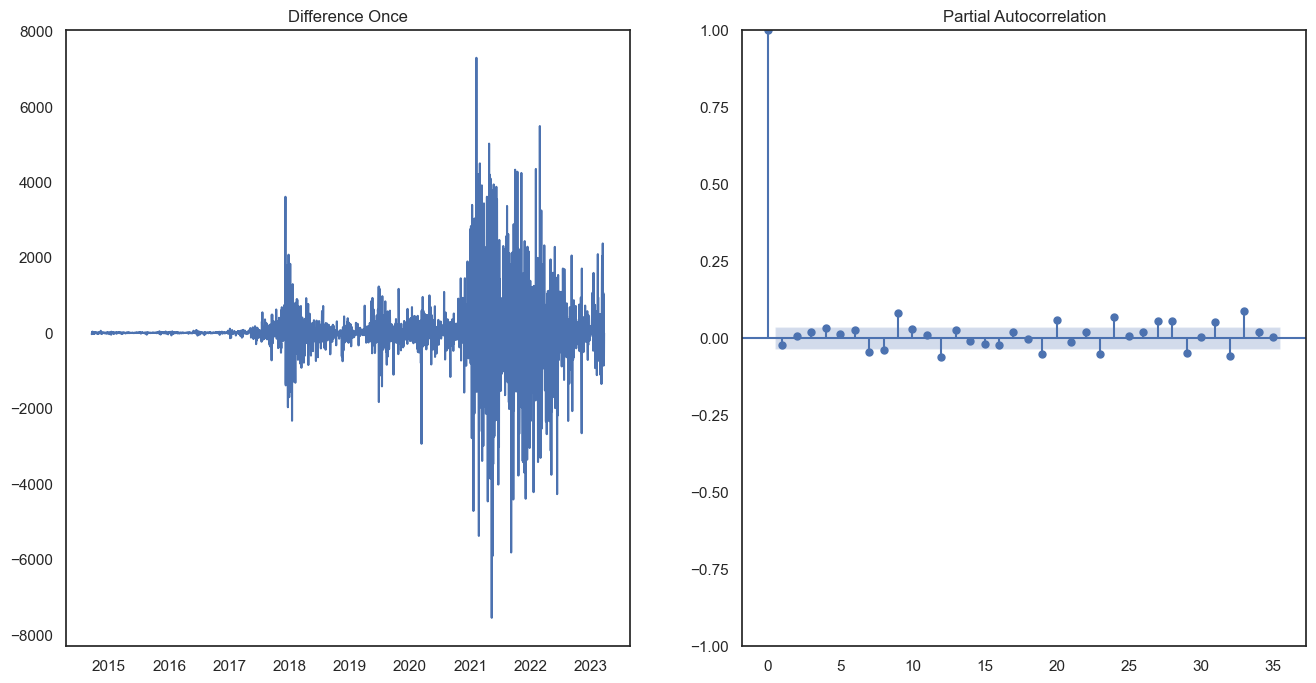

In [348]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(16,8))
ax1.plot(diff)
ax1.set_title('Difference Once')
plot_pacf(diff,ax=ax2);
plt.savefig('pics/differenceonce.png')
plt.show()

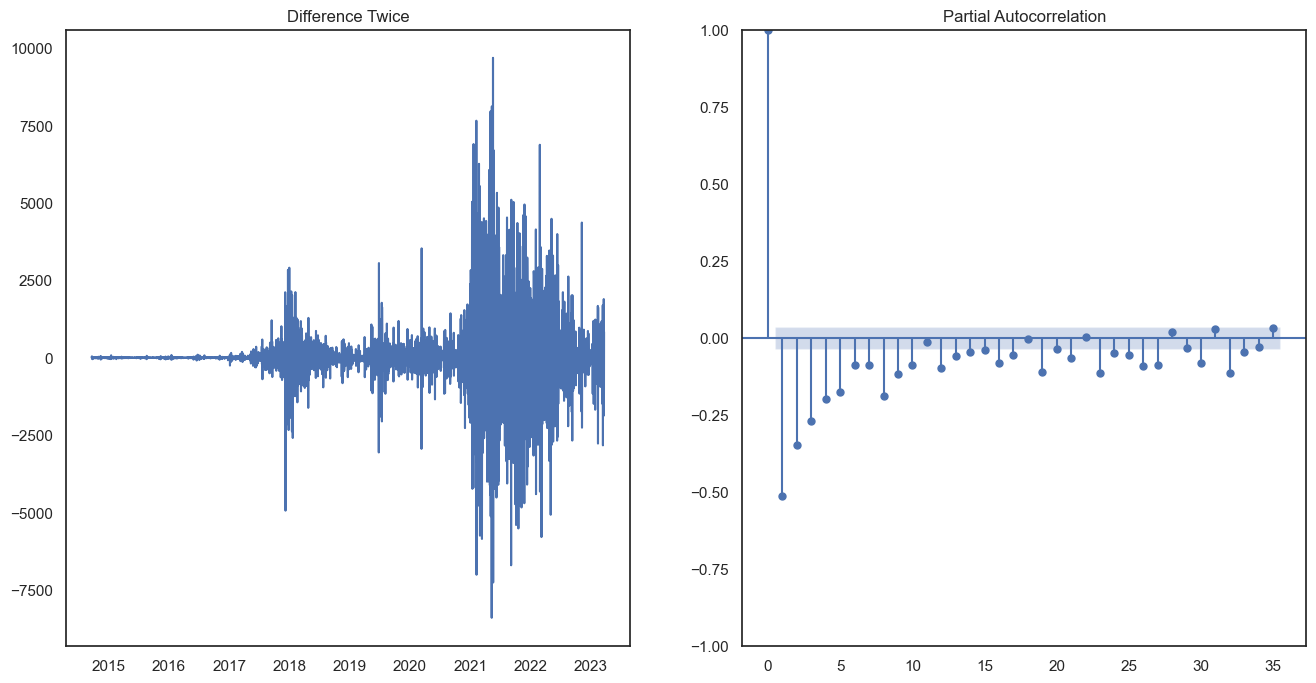

In [349]:
diff=df.Close.diff().diff().dropna()
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(16,8))
ax1.plot(diff)
ax1.set_title('Difference Twice')
plot_pacf(diff,ax=ax2);
plt.savefig('pics/differencetwice.png')
plt.show()

The order of differencing (d) might be 1 or 4. If we difference twice the lags move to the extreme negative which indicates that it has overdifferenced. 

#### Finding d from statsmodel

In [350]:
ndiffs(df.Close,test='adf')

1

If d=0, then the time series is stationary. Therefore, we can conclude that d term for our model is 1.

### 4.1.3 AutoRegressive (AR)

It finds the p term for ARIMA model, which can be found by drawing PACF plot. If plot has sharp drop off after p lags, then we set that as p value. If it shows gradual decline, we increase the value of p until we see gradual decline

C:\Users\User\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


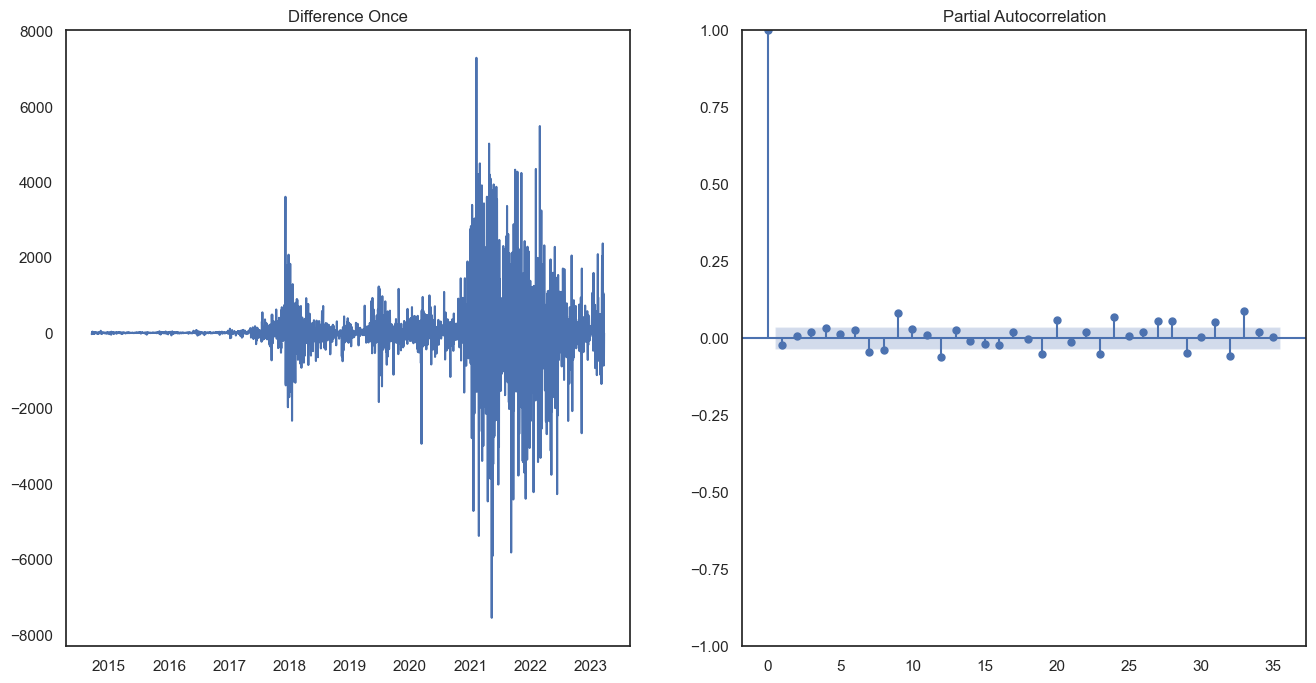

In [351]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(16,8))
ax1.plot(diff)
ax1.set_title('Difference Once')
plot_pacf(diff,ax=ax2);
plt.savefig('pics/pacf.png')
plt.show()

p might be 1 or 4.

### 4.1.4. Moving Average(MA)

It finds the q term for ARIMA model, which can be found by drawing ACF plot. If plot has sharp drop off after q lags, then we set that as q value. If it shows gradual decline, we increase the value of q until we see gradual decline

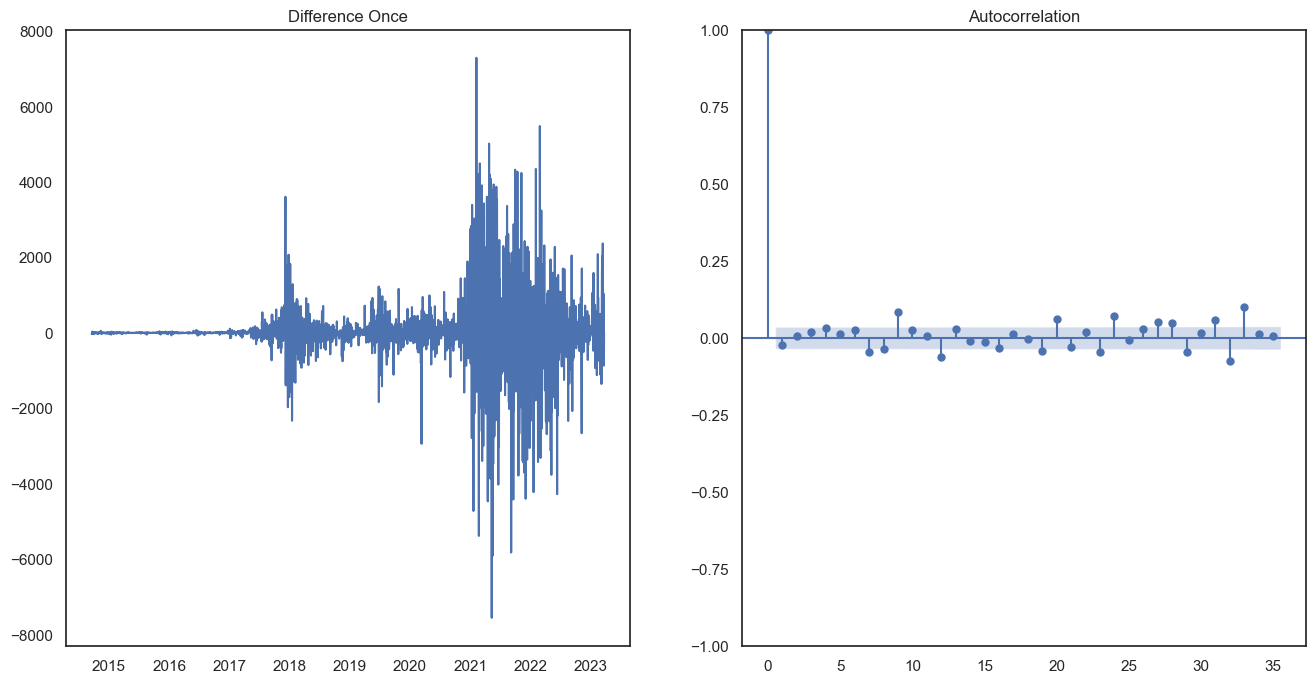

In [352]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(16,8))
ax1.plot(diff)
ax1.set_title('Difference Once')
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);
plt.savefig('pics/acf.png')
plt.show()

q might be 0 or 3.

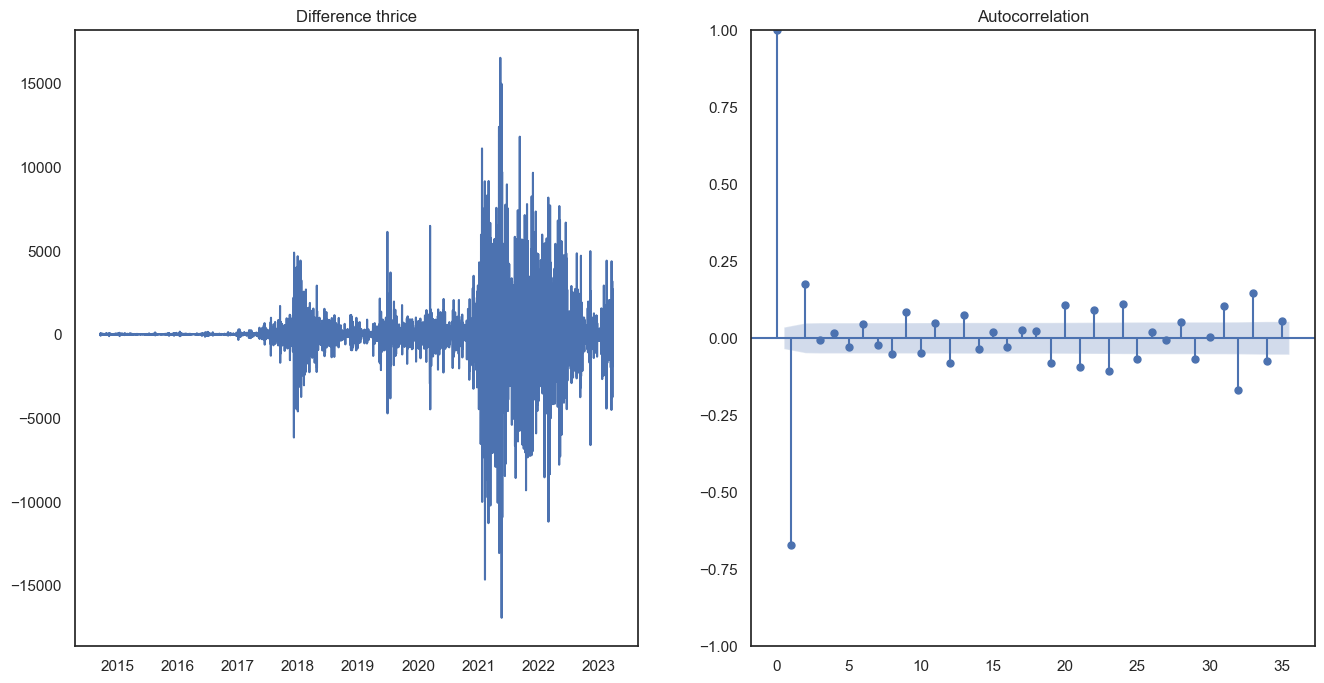

In [353]:
diff=df.Close.diff().diff().diff().dropna()
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(16,8))
ax1.plot(diff)
ax1.set_title('Difference thrice')
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);

### 4.1.5. Auto Arima

In [354]:

model = pm.auto_arima(df.Close,
                      start_p=1, start_q=1,
                      test='adf',       
                      max_p=10, max_q=10,
                      m=1,             
                      d=None,           
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=50365.235, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=50362.925, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=50363.261, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=50363.286, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=50361.299, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.756 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3112
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -25179.649
Date:                Sun, 02 Apr 2023   AIC                          50361.299
Time:                        16:35:55   BIC                          50367.342
Sample:                    09-17-2014   HQIC                         50363.468
                         - 03-25-2023                                  

In [355]:
model = pm.auto_arima(df.Close, seasonal=False, trace=True,test='adf')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=50341.011, Time=4.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=50362.925, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=50363.261, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=50363.286, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=50361.299, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=50365.764, Time=0.92 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=50367.135, Time=0.45 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=50346.444, Time=6.54 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=50347.443, Time=4.75 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=50365.235, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=50365.728, Time=1.28 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=50366.012, Time=1.02 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=50348.434, Time=7.40 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=50364.294, Time=1.06 sec

Best model:  ARIMA

In [356]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3112
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -25164.506
Date:                Sun, 02 Apr 2023   AIC                          50341.011
Time:                        16:36:27   BIC                          50377.268
Sample:                    09-17-2014   HQIC                         50354.029
                         - 03-25-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.7569     14.842      0.523      0.601     -21.333      36.846
ar.L1          0.9304      0.007    133.217      0.000       0.917       0.944
ar.L2         -0.9507      0.007   -134.003      0.0

### 4.1.6 Fitting the Model

In [357]:
model= ARIMA(df.Close,order=(2,1,2))
result= model.fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [358]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3112
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -25177.147
Date:                Sun, 02 Apr 2023   AIC                          50364.294
Time:                        16:36:32   BIC                          50394.507
Sample:                    09-17-2014   HQIC                         50375.142
                         - 03-25-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9899      0.313      3.164      0.002       0.377       1.603
ar.L2         -0.0238      0.308     -0.077      0.938      -0.628       0.580
ma.L1         -1.0138      0.313     -3.239      0.0

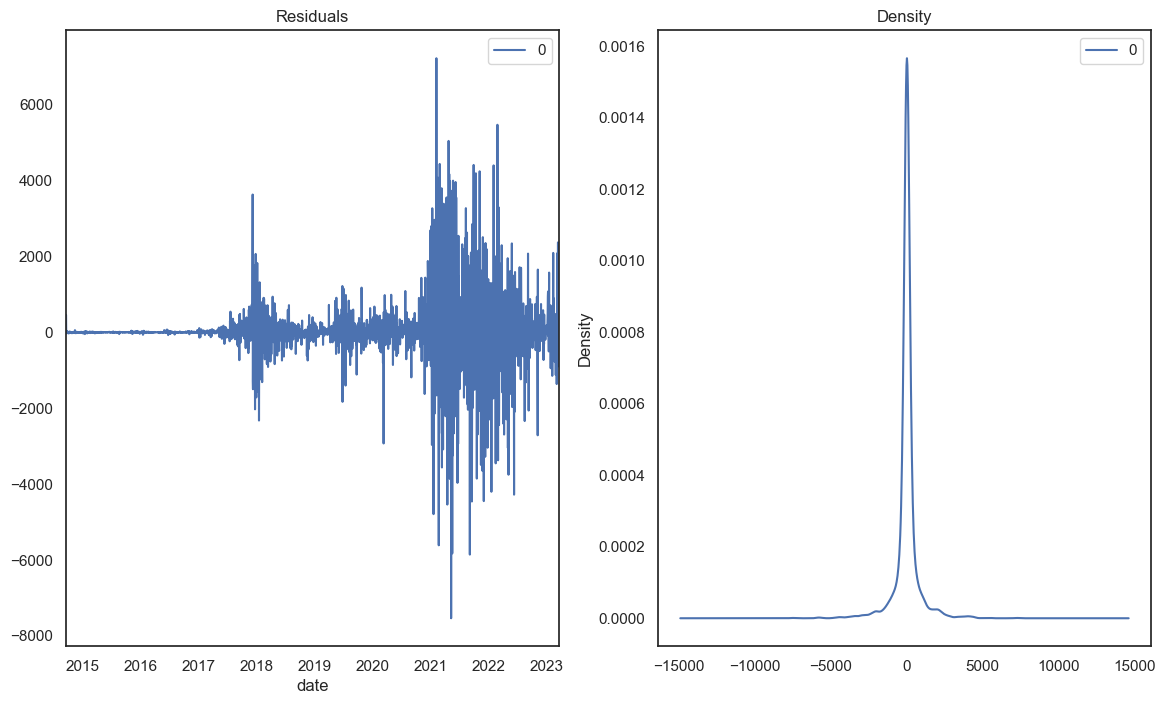

In [359]:
# Plot residual errors
residuals = pd.DataFrame(result.resid)
fig, ax = plt.subplots(1,2,figsize=(14,8))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

The residual errors seem fine with near zero mean and uniform variance.

<AxesSubplot:xlabel='date'>

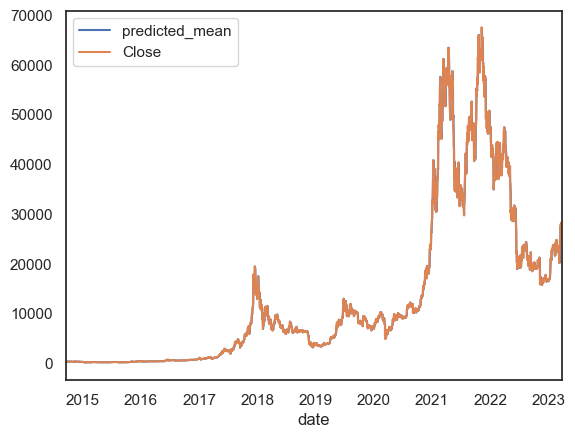

In [360]:
result.predict(dynamic=False).plot(legend=True)
df.Close.plot(legend=True)

### 4.1.7 Splitting the data

Since we are dealing with timeseries we cannot use train test splits from scikit learn because the order of the data matters.

In [361]:
train_size= int(len(df)*0.8)

In [362]:
train_size

2489

In [363]:
train_data= df.iloc[:train_size]

In [364]:
train_data

,Close
date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2021-07-06,34235.195312
2021-07-07,33855.328125
2021-07-08,32877.371094


In [365]:
test_data= df.iloc[train_size:]

In [366]:
test_data

,Close
date,
2021-07-11,34240.187500
2021-07-12,33155.847656
2021-07-13,32702.025391
2021-07-14,32822.347656
2021-07-15,31780.730469
...,...
2023-03-21,28175.816406
2023-03-22,27307.437500
2023-03-23,28333.972656


Fit the model

In [367]:
ARIMAmodel = ARIMA(df.Close, order = (2, 1, 2))
ARIMAmodel = ARIMAmodel.fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Predict

In [368]:
y_pred=ARIMAmodel.predict()

In [369]:
y_pred

2014-09-17        0.000000
2014-09-18      453.263988
2014-09-19      426.593815
2014-09-20      396.851530
2014-09-21      409.615723
                  ...     
2023-03-21    27817.043964
2023-03-22    28207.357816
2023-03-23    27370.238027
2023-03-24    28344.134973
2023-03-25    27552.404006
Freq: D, Name: predicted_mean, Length: 3112, dtype: float64

In [370]:
conf_int= ARIMAmodel.get_forecast().conf_int(alpha=0.05)

In [371]:
conf_int

,lower Close,upper Close
2023-03-26,25966.59651,29073.216563


In [372]:
fc_series= pd.Series(y_pred,index= test_data.index)

In [373]:
fc_series

date
2021-07-11    33496.865060
2021-07-12    34193.539885
2021-07-13    33158.346678
2021-07-14    32683.991177
2021-07-15    32786.823439
                  ...     
2023-03-21    27817.043964
2023-03-22    28207.357816
2023-03-23    27370.238027
2023-03-24    28344.134973
2023-03-25    27552.404006
Name: predicted_mean, Length: 623, dtype: float64

In [374]:
lower_series = pd.Series(conf_int.iloc[:, 0])
upper_series = pd.Series(conf_int.iloc[:, 1])

In [375]:
lower_series,upper_series

(2023-03-26    25966.59651
 Freq: D, Name: lower Close, dtype: float64,
 2023-03-26    29073.216563
 Freq: D, Name: upper Close, dtype: float64)

In [376]:
y_pred_df= pd.DataFrame({'Predictions': y_pred}, index=test_data.index)

In [377]:
y_pred_df

,Predictions
date,
2021-07-11,33496.865060
2021-07-12,34193.539885
2021-07-13,33158.346678
2021-07-14,32683.991177
2021-07-15,32786.823439
...,...
2023-03-21,27817.043964
2023-03-22,28207.357816
2023-03-23,27370.238027


In [378]:
y_pred_out= y_pred_df['Predictions']

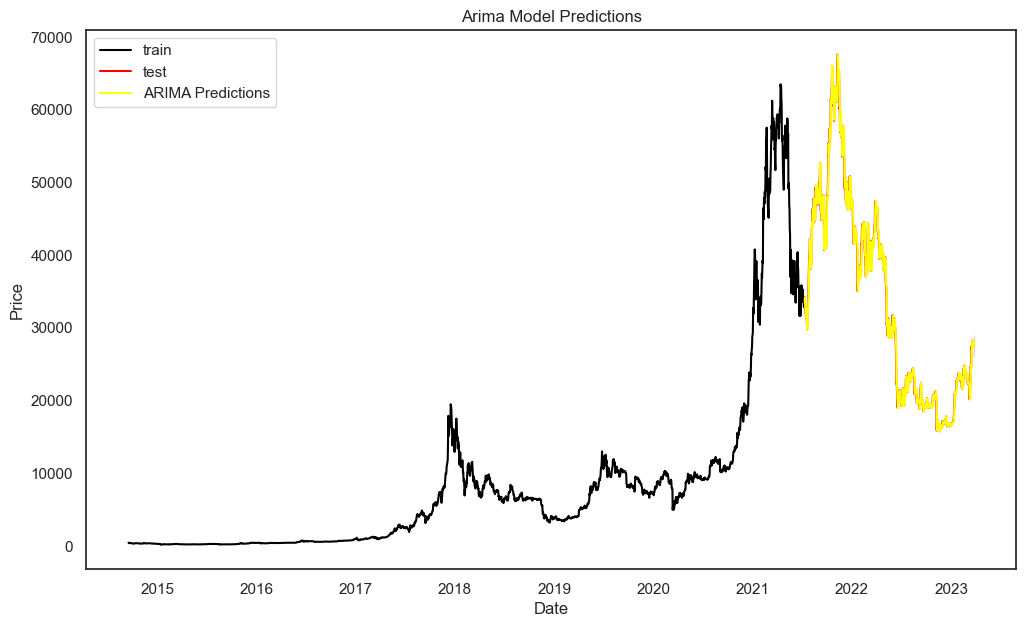

In [380]:
plt.figure(figsize=(12,7))
plt.plot(train_data, color = "black", label = 'train')
plt.plot(test_data, color = "red", label = 'test')
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.legend()
plt.title('Arima Model Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.savefig('pics/ARIMApreds.png')
plt.show()

In [381]:
rmse = np.sqrt(mean_squared_error(test_data["Close"], y_pred_df["Predictions"]))
print("Root Mean Square Error is: ",rmse)

Root Mean Square Error is:  1214.397099509796


It implies that average differnce between the actual and predicted prices is 1214.39 which is not bad considering when the price is higher.

In [382]:
MAPE = np.mean(np.abs((test_data["Close"].values - y_pred_df["Predictions"]) / test_data["Close"].values)) * 100
print("Mean Absolute Percentage Error is: ",MAPE)

Mean Absolute Percentage Error is:  2.3427231549629077


It implies accuracy of prediction of model. The model predicted  price is off by 2.34% which is not bad.

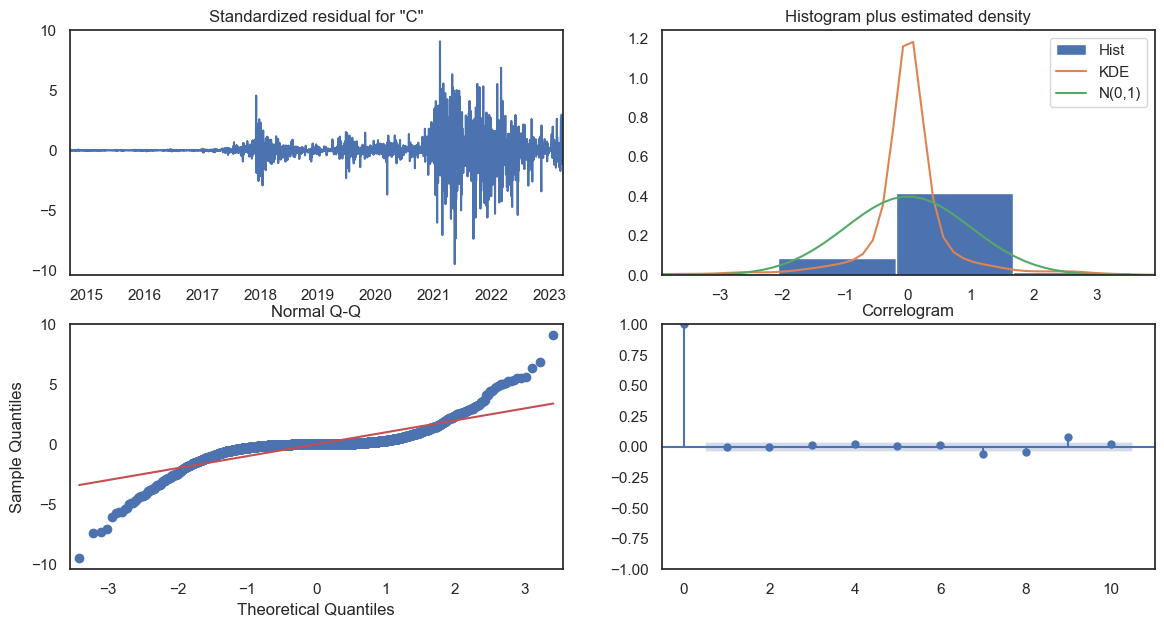

In [384]:
ARIMAmodel.plot_diagnostics(figsize=(14,7))
plt.savefig('pics/ARIMAresults.png')
plt.show()

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot suggest normal distribution with mean zero.

Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model.

Overall, it seems to be a good fit. Let’s forecast.

### 4.1.8. Forecasting

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


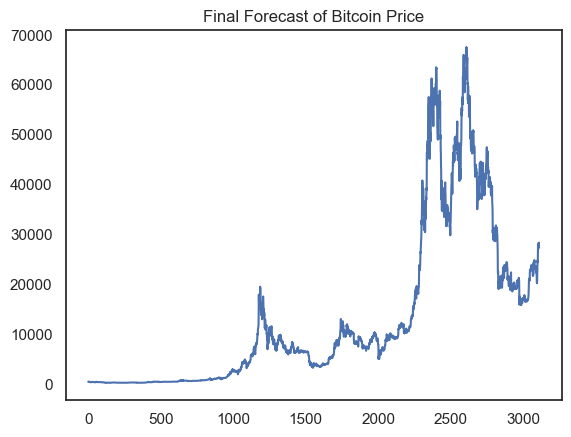

In [385]:
# Forecast
n_periods = 61

index_of_fc = np.arange(3113 + n_periods)

y_pred = ARIMAmodel.predict(start=3113, end=3173,return_conf_int=True,dynamic=True)
conf_int = ARIMAmodel.get_forecast(steps=60).conf_int()


fc_series = pd.Series(y_pred, index=index_of_fc)

# make series for plotting purpose

lower_series = pd.Series(conf_int.iloc[:, 0], index=index_of_fc)
upper_series = pd.Series(conf_int.iloc[:, 1], index=index_of_fc)

# Plot
plt.plot(df.values)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Bitcoin Price")
plt.show()

In [386]:
index_of_fc

array([   0,    1,    2, ..., 3171, 3172, 3173])

In [387]:

y_pred = ARIMAmodel.predict(start=3113, end=3173,return_conf_int=True,dynamic=True)

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [388]:
y_pred

2023-03-27    27549.283162
2023-03-28    27577.573170
2023-03-29    27604.878042
2023-03-30    27631.233598
2023-03-31    27656.672881
                  ...     
2023-05-22    28250.794112
2023-05-23    28254.693871
2023-05-24    28258.458052
2023-05-25    28262.091368
2023-05-26    28265.598368
Freq: D, Name: predicted_mean, Length: 61, dtype: float64

In [389]:
conf_int = ARIMAmodel.get_forecast(steps=60).conf_int()

In [390]:
conf_int

,lower Close,upper Close
2023-03-26,25966.596510,29073.216563
2023-03-27,25378.673613,29719.892711
2023-03-28,24923.023736,30232.122603
2023-03-29,24535.566997,30674.189086
2023-03-30,24191.364371,31071.102825
2023-03-31,23877.560527,31435.785235
2023-04-01,23586.521214,31775.934280
2023-04-02,23313.289918,32096.567967
2023-04-03,23054.443118,32401.169175
2023-04-04,22807.505723,32692.270290


In [391]:
fc_series = pd.Series(y_pred)

In [392]:
fc_series

2023-03-27    27549.283162
2023-03-28    27577.573170
2023-03-29    27604.878042
2023-03-30    27631.233598
2023-03-31    27656.672881
                  ...     
2023-05-22    28250.794112
2023-05-23    28254.693871
2023-05-24    28258.458052
2023-05-25    28262.091368
2023-05-26    28265.598368
Freq: D, Name: predicted_mean, Length: 61, dtype: float64

In [393]:
lower_series = pd.Series(conf_int.iloc[:, 0])
upper_series = pd.Series(conf_int.iloc[:, 1])

In [394]:
lower_series,upper_series

(2023-03-26    25966.596510
 2023-03-27    25378.673613
 2023-03-28    24923.023736
 2023-03-29    24535.566997
 2023-03-30    24191.364371
 2023-03-31    23877.560527
 2023-04-01    23586.521214
 2023-04-02    23313.289918
 2023-04-03    23054.443118
 2023-04-04    22807.505723
 2023-04-05    22570.624409
 2023-04-06    22342.372219
 2023-04-07    22121.625275
 2023-04-08    21907.481571
 2023-04-09    21699.205567
 2023-04-10    21496.189223
 2023-04-11    21297.923919
 2023-04-12    21103.979756
 2023-04-13    20913.990010
 2023-04-14    20727.639271
 2023-04-15    20544.654242
 2023-04-16    20364.796517
 2023-04-17    20187.856850
 2023-04-18    20013.650548
 2023-04-19    19842.013736
 2023-04-20    19672.800306
 2023-04-21    19505.879404
 2023-04-22    19341.133335
 2023-04-23    19178.455823
 2023-04-24    19017.750537
 2023-04-25    18858.929855
 2023-04-26    18701.913802
 2023-04-27    18546.629149
 2023-04-28    18393.008642
 2023-04-29    18240.990328
 2023-04-30    18090

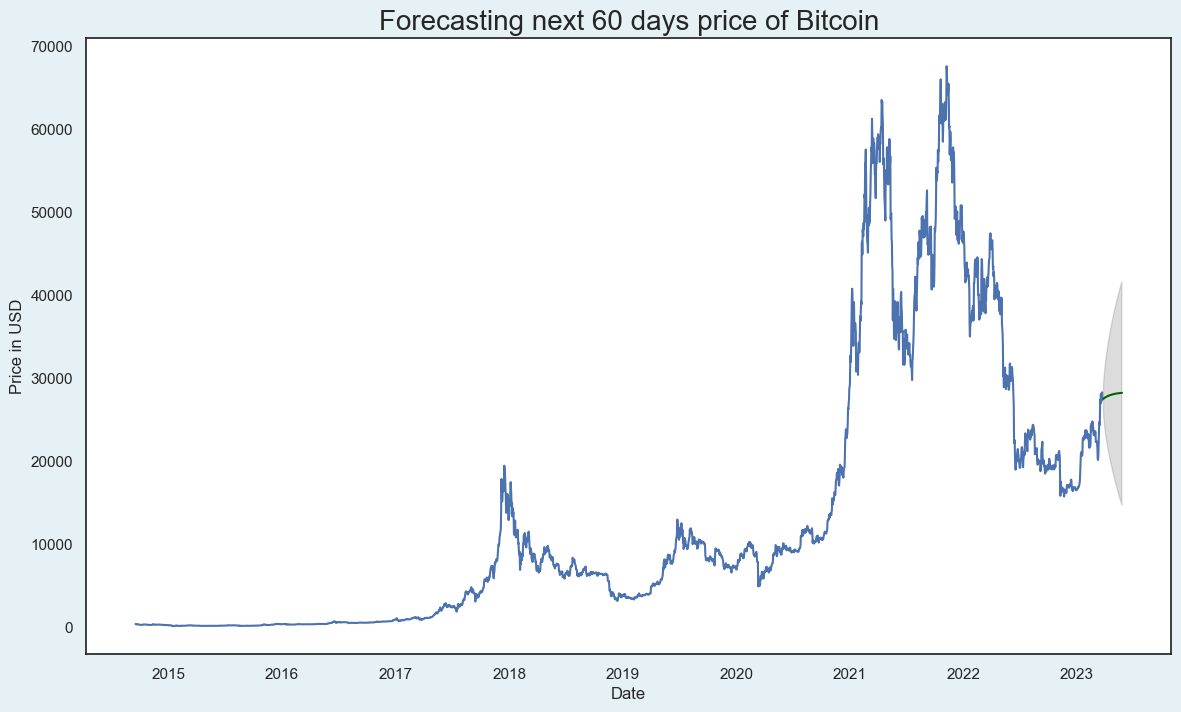

In [407]:
plt.figure(figsize=(14,8),facecolor='#E6F1F6')
plt.plot(df)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.150)

plt.title("Forecasting next 60 days price of Bitcoin", fontsize=20)
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.savefig('pics/next60days.png')
plt.show()

In [408]:
fc_series

2023-03-27    27549.283162
2023-03-28    27577.573170
2023-03-29    27604.878042
2023-03-30    27631.233598
2023-03-31    27656.672881
                  ...     
2023-05-22    28250.794112
2023-05-23    28254.693871
2023-05-24    28258.458052
2023-05-25    28262.091368
2023-05-26    28265.598368
Freq: D, Name: predicted_mean, Length: 61, dtype: float64

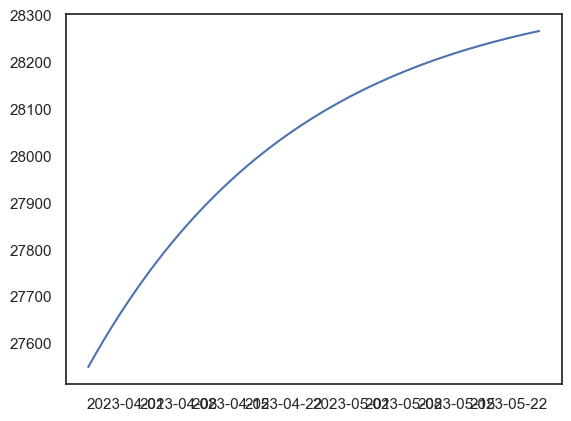

In [409]:
plt.plot(fc_series)

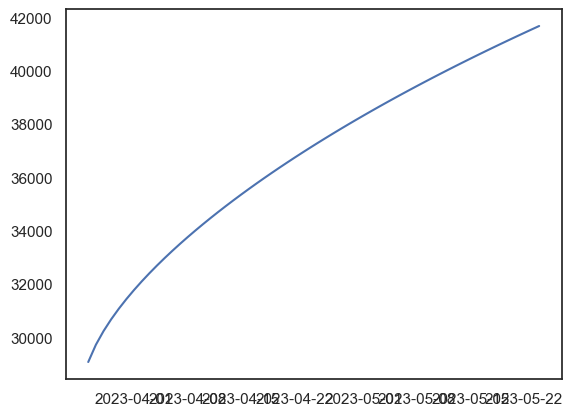

In [410]:
plt.plot(upper_series)

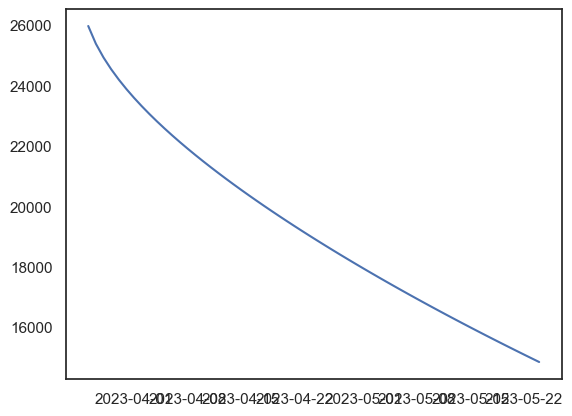

In [411]:
plt.plot(lower_series)

## 4.2 LSTM

In [459]:
data=df.copy()

In [460]:
data

,Close
date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2023-03-21,28175.816406
2023-03-22,27307.437500
2023-03-23,28333.972656


Converting into numpy array for easier processing

In [461]:
data=data.values

In [462]:
data

array([[  457.33401489],
       [  424.44000244],
       [  394.79598999],
       ...,
       [28333.97265625],
       [27493.28515625],
       [27486.72851562]])

In [463]:
scaler=MinMaxScaler(feature_range=(0,1))

In [464]:
scaled_data= scaler.fit_transform(data)

In [465]:
scaled_data

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.41781277],
       [0.40533757],
       [0.40524028]])

In [466]:
scaled_data.shape

(3112, 1)

### 4.2.1. Split

In [467]:
training_data= math.ceil(len(scaled_data)*0.8)

In [468]:
training_data

2490

In [469]:
train_data=scaled_data[0:training_data,:]

Looking for past 60 days to predict the 61st and so on. 

In [470]:
prediction_days=60

x_train=[]
y_train=[]

for x in range(prediction_days,len(train_data)):
    x_train.append(train_data[x-prediction_days:x,0])
    y_train.append(train_data[x,0])


In [471]:
## Convert the x_train and y_train to numpy arrays

x_train,y_train= np.array(x_train), np.array(y_train)

Reshape the data because LSTM expect the input to  be 3 dimensional in terms of number of samples, timesteps and features

In [472]:
## Reshape

x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [473]:
x_train.shape

(2430, 60, 1)

In [474]:
np.random.seed(27)
tf.random.set_seed(27)

### 4.2.2. Build the model

In [475]:
model= Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

In [476]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [477]:
## Fit

model.fit(x_train,y_train, epochs=100, batch_size=64)

Epoch 1/100
38/38 [==============================] - 9s 101ms/step - loss: 0.0044
Epoch 2/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0018
Epoch 3/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0015
Epoch 4/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0013
Epoch 5/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0011
Epoch 6/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0012
Epoch 7/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0012
Epoch 8/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0011
Epoch 9/100
38/38 [==============================] - 4s 98ms/step - loss: 9.5648e-04
Epoch 10/100
38/38 [==============================] - 4s 111ms/step - loss: 8.3545e-04
Epoch 11/100
38/38 [==============================] - 4s 104ms/step - loss: 8.5210e-04
Epoch 12/100
38/38 [==============================] - 4s 102ms/step - loss: 9.0868e-04
E

In [486]:
print(model.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_45 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_45 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_46 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_46 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_47 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_47 (Dropout)        (None, 50)                0         
                                                                 
 dense_30 (Dense)            (None, 25)              

In [487]:
test_data= scaled_data[training_data-60:,:]

In [488]:
test_data.shape

(682, 1)

In [489]:
train_data.shape

(2490, 1)

In [490]:
2490+682-60


3112

In [491]:
x_test=[]
y_test=data[training_data:,:]
for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [492]:
## Numpy array

x_test= np.array(x_test)

## Reshape

x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [493]:
x_test

array([[[0.73510945],
        [0.73754819],
        [0.69124448],
        ...,
        [0.49889516],
        [0.49477738],
        [0.50545673]],

       [[0.73754819],
        [0.69124448],
        [0.68673143],
        ...,
        [0.49477738],
        [0.50545673],
        [0.48936591]],

       [[0.69124448],
        [0.68673143],
        [0.6434223 ],
        ...,
        [0.50545673],
        [0.48936591],
        [0.48263151]],

       ...,

       [[0.33451164],
        [0.33768748],
        [0.33326592],
        ...,
        [0.40940281],
        [0.41546584],
        [0.40257973]],

       [[0.33768748],
        [0.33326592],
        [0.34040941],
        ...,
        [0.41546584],
        [0.40257973],
        [0.41781277]],

       [[0.33326592],
        [0.34040941],
        [0.33914686],
        ...,
        [0.40257973],
        [0.41781277],
        [0.40533757]]])

In [494]:
## Evaluate

score= model.evaluate(x_test,y_test)
print(f'Test lost score:',{score})

20/20 [==============================] - 2s 25ms/step - loss: 1310690944.0000
Test lost score: {1310690944.0}


### 4.2.3. Predictions

In [495]:
## Predict the values

predictions= model.predict(x_test)

20/20 [==============================] - 2s 29ms/step


In [496]:
predictions= scaler.inverse_transform(predictions)

In [497]:
predictions

array([[34450.91 ],
       [34437.945],
       [34085.594],
       [33735.734],
       [33184.3  ],
       [32590.537],
       [32221.746],
       [32189.504],
       [32012.635],
       [31459.387],
       [31645.674],
       [32284.809],
       [33328.633],
       [34441.707],
       [35537.125],
       [36926.758],
       [38709.973],
       [40215.71 ],
       [40972.887],
       [41898.668],
       [42355.08 ],
       [41786.117],
       [40688.45 ],
       [39429.996],
       [39157.676],
       [39924.734],
       [41612.758],
       [43713.14 ],
       [44823.39 ],
       [45977.754],
       [46418.24 ],
       [46349.26 ],
       [45661.62 ],
       [46280.45 ],
       [47036.457],
       [47469.996],
       [47166.605],
       [46179.227],
       [45361.125],
       [45723.51 ],
       [47543.77 ],
       [49062.2  ],
       [49874.79 ],
       [50110.21 ],
       [49288.254],
       [48864.1  ],
       [48062.176],
       [48247.465],
       [48776.66 ],
       [49178.56 ],


In [498]:
rmse= np.sqrt(np.mean(predictions-y_test)**2)

In [499]:
rmse

437.930284113746

In [500]:
MAPE = np.mean(np.abs((y_test- predictions) / y_test)) * 100
print("Mean Absolute Percentage Error is: ",MAPE)

Mean Absolute Percentage Error is:  3.5275787337491837


C:\Users\User\AppData\Local\Temp\ipykernel_8360\2344254938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


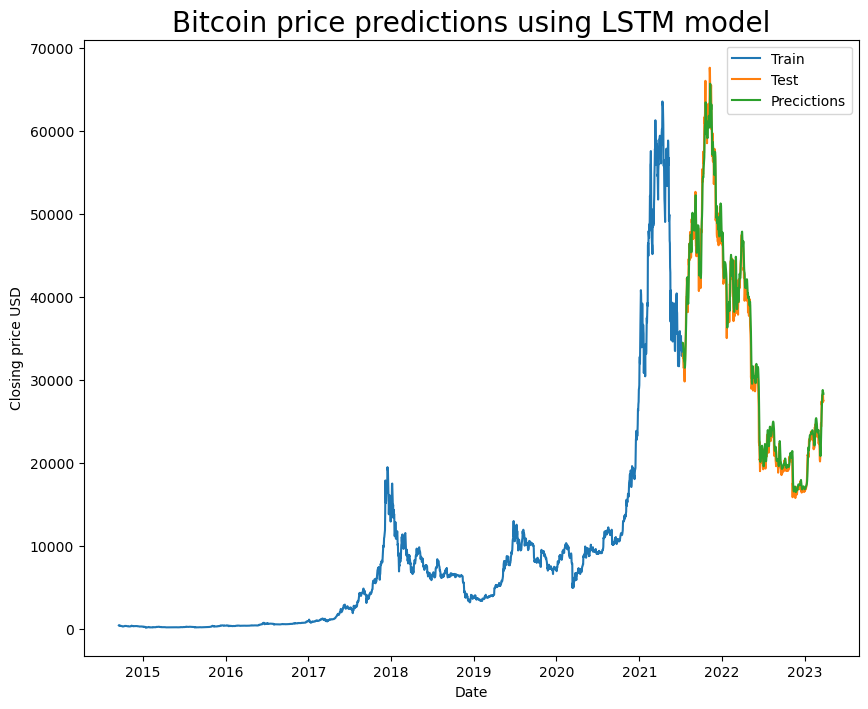

In [458]:
train=df[:training_data]
valid=df[training_data:]

valid['Predictions']=predictions
plt.figure(figsize=(10,8))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

plt.title('Bitcoin price predictions using LSTM model',fontsize=20)
plt.xlabel('Date')
plt.ylabel('Closing price USD')
plt.legend(['Train','Test','Precictions'])
plt.savefig('pics/LSTMpred.png')
plt.show()


In [386]:
print(valid.shape)
print(predictions.shape)

(622, 2)
(622, 1)


### 4.2.4. Actual Vs Predicted

In [387]:
df1= pd.DataFrame({'Actual': valid['Close'], 'Predicted': valid['Predictions']})

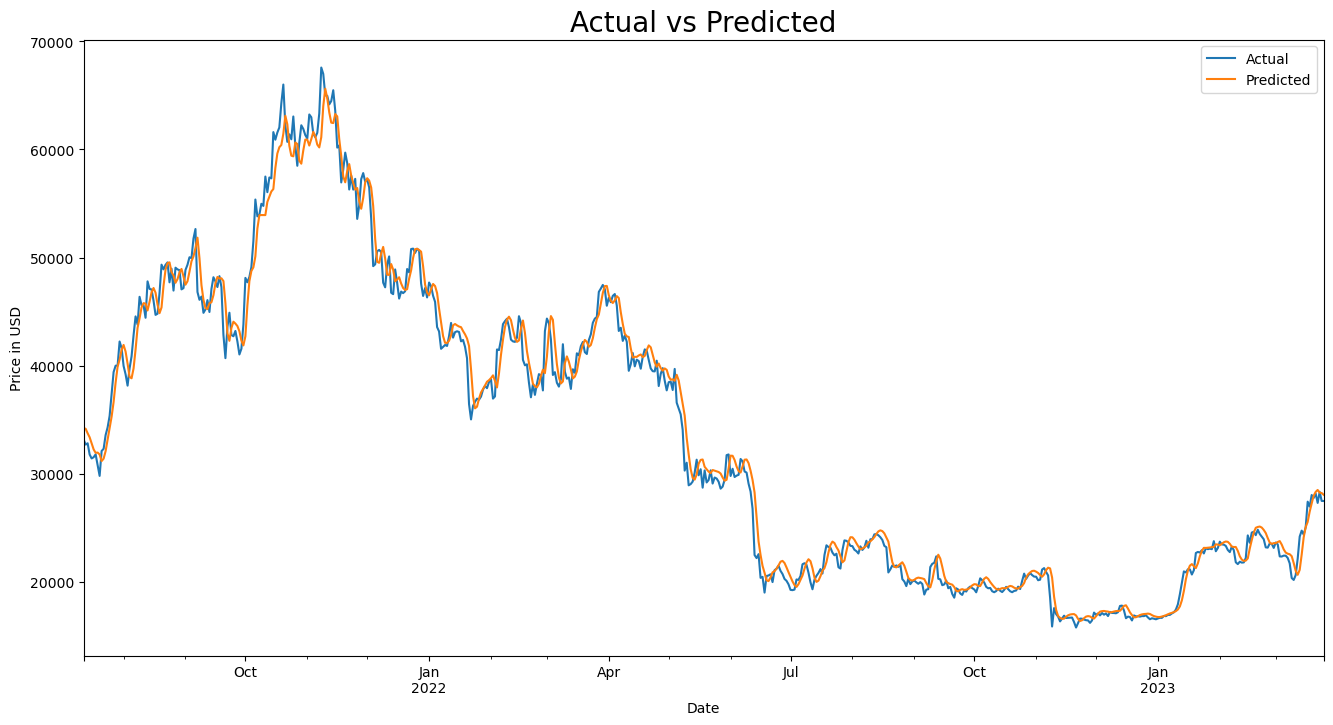

In [388]:
df1.plot(figsize=(16,8))
plt.title('Actual vs Predicted', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.savefig('pics/LSTMActVsPred.png')
plt.show()

It shows that the model is predicting accurately, and it suggests that model is a good fit for the data. The predicted values closely align with the observed values which indicates that the model is capturing the underlying patterns and trends in the data.  